# Loan Data from Prosper
## by Shikhar Sharma

## Preliminary Wrangling
>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.<br>
This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1620931527882000&usg=AOvVaw3vbnU-g9ISX-OFBKzCIkqf) explains the variables in the data set.

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


What affects the original loan amount?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
# Loading data.
df = pd.read_csv('/Users/MICROSOFT/Downloads/prosperLoanData.csv')

In [3]:
ford = pd.read_csv('/Users/MICROSOFT/201902-fordgobike-tripdata.csv')

In [4]:
# Showing first 5 rows.
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [5]:
df.duplicated().value_counts()

False    113937
dtype: int64

In [6]:
df.shape

(113937, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
# Selecting 17 features for visualization.
new_df = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
       'IncomeVerifiable']]

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CreditScoreRangeLower      113346 non-null  float64
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  Investors                  11

In [10]:
new_df.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [11]:
# Removing duplicate data.
new_df2=new_df.drop_duplicates()

In [12]:
new_df2.duplicated().value_counts()

False    113066
dtype: int64

In [13]:
new_df2.isnull().sum()

LoanKey                         0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3529
EmploymentStatus             2255
LoanOriginalAmount              0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
DebtToIncomeRatio            8472
Investors                       0
StatedMonthlyIncome             0
MonthlyLoanPayment              0
IncomeVerifiable                0
dtype: int64

In [14]:
# Removing null data.
new_df2=new_df2.dropna()

In [15]:
new_df2.isna().sum()

LoanKey                      0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
LoanOriginalAmount           0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
Investors                    0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
IncomeVerifiable             0
dtype: int64

In [16]:
new_df2.shape

(97022, 17)

In [17]:
new_df2.head()

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable  
0              True  
1              True  
2              True  
3              True  
4              True

In [18]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanKey                    97022 non-null  object 
 1   Term                       97022 non-null  int64  
 2   LoanStatus                 97022 non-null  object 
 3   BorrowerAPR                97022 non-null  float64
 4   BorrowerRate               97022 non-null  float64
 5   ListingCategory (numeric)  97022 non-null  int64  
 6   BorrowerState              97022 non-null  object 
 7   Occupation                 97022 non-null  object 
 8   EmploymentStatus           97022 non-null  object 
 9   LoanOriginalAmount         97022 non-null  int64  
 10  CreditScoreRangeLower      97022 non-null  float64
 11  CreditScoreRangeUpper      97022 non-null  float64
 12  DebtToIncomeRatio          97022 non-null  float64
 13  Investors                  97022 non-null  in

### Structure of my dataset.

>Number of rows in dataset are 97022 and Number of Columns in dataset are 14.<br>

### What is/are the main feature(s) of interest in your dataset?

>The main features of interest in our dataset are<br>
- LoanKey<br>
- Term<br>
- Loanstatus<br>
- BorrowerAPR<br>
- BorrowerRate<br>
- ListingCategory<br>
- BorrowerState<br>
- Occupation<br>
- EmploymentStatus<br>
- LoanOriginalAmount<br>
- CreditScoreRangeLower<br>
- CreditScoreRangeUpper<br>
- DebtToIncomeRatio<br>
- Investors

In [19]:
# Functioon to calculate cuberoot.
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
# Function to calculate log.
def log_trans(z,inverse=False):

    if not inverse:

        return np.log10(z)
    else:
        return z**3

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Let's look at our first variable "Term".

In [20]:
new_df2['Term'].value_counts()

36    73003
60    22604
12     1415
Name: Term, dtype: int64

In [21]:
new_df2['Term'].value_counts().values[0]

73003

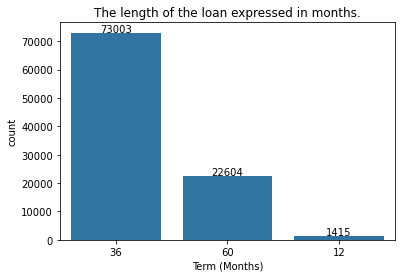

In [22]:
base_color = sns.color_palette()[0]
sns.countplot(x='Term',data=new_df2,color=base_color,order=new_df2['Term'].value_counts().index)
plt.xlabel('Term (Months)')
# Adding counts of each term in our data on top of of each bar.
for i in range (new_df2['Term'].value_counts().shape[0]):
    count = new_df2['Term'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title('The length of the loan expressed in months.');

>So, from the above plot we can say that the length of the loan (in months) is maximum for 36 months and minimum for 12 months. We will try to find out why loan term is minimum for 12 months and maximum for 36 months later.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Let's look at our second variable "Loan Status".

In [23]:
new_df2['LoanStatus'].value_counts()

Current                   50466
Completed                 31074
Chargedoff                 9613
Defaulted                  3848
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

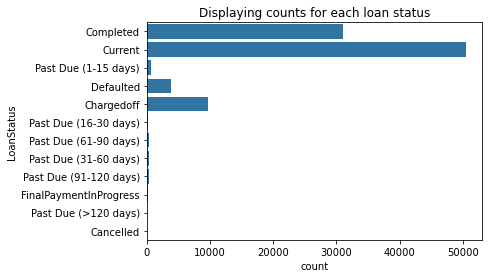

In [24]:
# Countplot.
sns.countplot(y='LoanStatus',data = new_df2,color=base_color)
plt.title('Displaying counts for each loan status');

>Loan status "current" has maximum counts whereas loan status "Completed" have second most number of counts.

### Let's look at our third variable "Borrower APR".

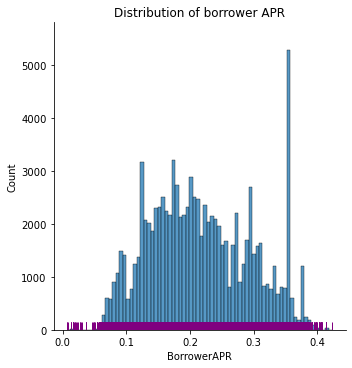

In [25]:
# Plotting displot.
sns.displot(data=new_df2,x='BorrowerAPR',rug=True,rug_kws={'c':'purple'})
plt.title('Distribution of borrower APR');

>Count of borrower APR between 0.34 and 0.36 is maximum. This could mean that average percentage rate for many loans is approximately between 0.3 and 0.4 which is very high. And minimum APR is approx. 0.02. There are some high bins between 0.16 and 0.2. There is a fall in count of APR values after 0.2 but again APR increases from 0.26 to 0.3. Than data fall and again their is huge rise in the count of APR.

### Let's look at our fourth variable "Borrower Rate" and try to find hidden pattern in it using histogram.

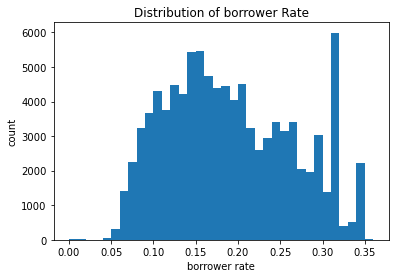

In [26]:
# Plotting histogram.
bins = np.arange(0,new_df2['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=new_df2,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

>It is a bimodal distribution with one peak lie between 0.15 and 0.17 and another peak lies between 0.30 and 0.33. It is right skewed distribution. After 0.16 rate their is decrease in count but between 0.32 and 0.34 their is sudden increase in the count of borrower rate.

### Let's look at our fifth variable "Listing Category" and try to find hidden pattern in it using histogram.

>Adding one column in our data for listing category names.

In [27]:
# Category names for each numerical value.
list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

In [28]:
# Running a loop over dataset and dictionary created.
#Appending dictionary values to a list based on keys which are equal to the values present in our listing category.
l=[]
for i in range(new_df2.shape[0]):
    for j in range(len(list_cat)):
        if new_df2['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            l.append(list(list_cat.values())[j])

In [29]:
# Assigning a new column with listing labels.
new_df2['ListingLabels'] = l

In [30]:
new_df2.head(5)

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable     ListingLabels  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

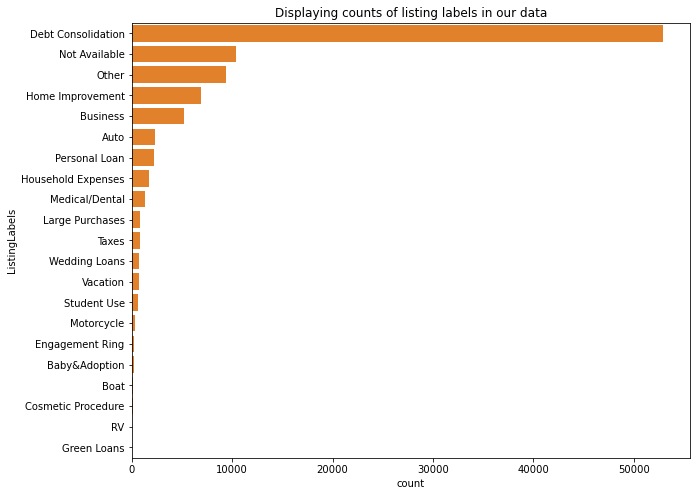

In [31]:
# Plotting countplot.
base_color2 = sns.color_palette()[1]
plt.figure(figsize=(10,8))
sns.countplot(y='ListingLabels',data=new_df2,order=new_df2['ListingLabels'].value_counts().index,color=base_color2)
plt.title('Displaying counts of listing labels in our data');

>Debt consolidation has the maximum number of counts in our dataset. This means that maximum loans are taken for Debt Consolidation category. This could mean that many borrowers already have existing debts that is why they have taken debt consolidation loan in order to reduce the burden of existing debts and pay some amount for new loan every month at low interest.

### Let's look at our sixth variable "Borrower State" and try to find hidden pattern in it using plots.

In [32]:
# Plotting map of US states using plotly.
fig = px.choropleth(locations=new_df2['BorrowerState'].value_counts().index, locationmode="USA-states",color= new_df2['BorrowerState'].value_counts().values,scope="usa", hover_name=new_df2['BorrowerState'].value_counts().index,hover_data={'Borrowers':new_df2['BorrowerState'].value_counts().values})
fig.layout.coloraxis.colorbar.title = 'Orders Obtained'
fig.show()

>  Yellow part of the graph shows that maximum number (13106) of borrowers are from california (CA).

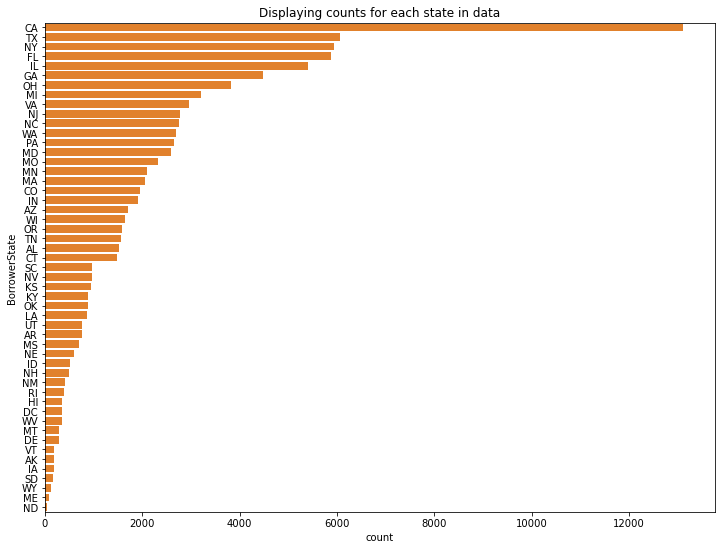

In [33]:
# Plotting countplot.
plt.figure(figsize=(12,9))
sns.countplot(y='BorrowerState',data=new_df2,color=base_color2,order = new_df2['BorrowerState'].value_counts().index)
plt.title('Displaying counts for each state in data');

### Let's look at our seventh variable "Occupation" and try to find hidden pattern in it using plots.

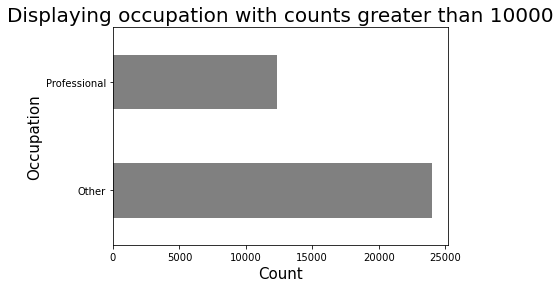

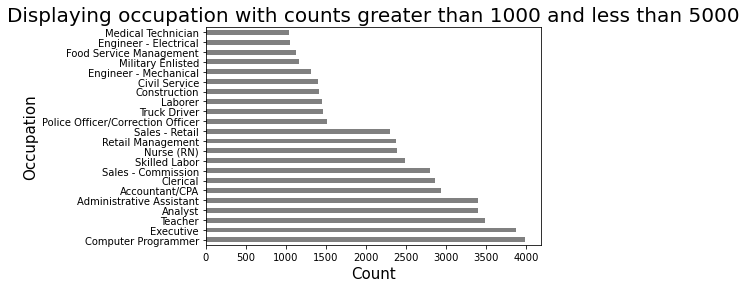

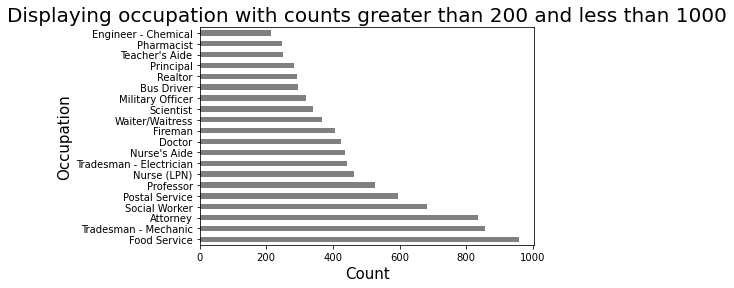

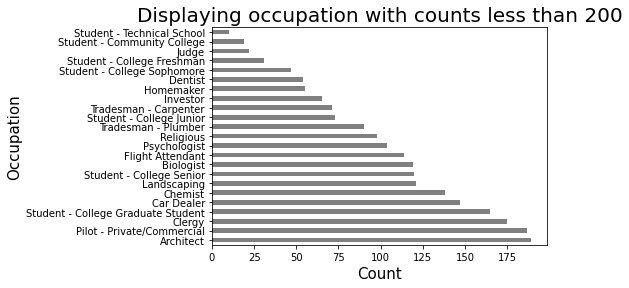

In [116]:
occupations = new_df2['Occupation'].value_counts()

occupations[occupations >10000].plot.barh(color='grey',rot=0)
plt.title('Displaying occupation with counts greater than 10000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

occupations[(occupations > 1000) & (occupations < 5000)].plot.barh(color='grey',rot=0)
plt.title('Displaying occupation with counts greater than 1000 and less than 5000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

occupations[(occupations > 200) & (occupations < 1000)].plot.barh(color='grey',rot=0)
plt.title('Displaying occupation with counts greater than 200 and less than 1000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

occupations[occupations < 200].plot.barh(color='grey',rot=0)
plt.title('Displaying occupation with counts less than 200',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

> I have plotted 4 subplots for different range in order to clearly show which occupation has the highest count and which occupation has lowest count. From above, we can see that "other" category has the highest count (first graph)and "Student Technical School" has the lowest count (fourth graph.
For above plots, range is
> - 1st plot: >10000
> - 2nd plot: <5000 & >1000
> - 3rd plot: <1000 & >200
> - 4th plot: <200

### Let's look at our eighth variable "EmploymentStatus" and try to find hidden pattern in it using plots.

In [36]:
new_df2['EmploymentStatus'].value_counts()

Employed         65172
Full-time        24117
Not available     2897
Other             2189
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: EmploymentStatus, dtype: int64

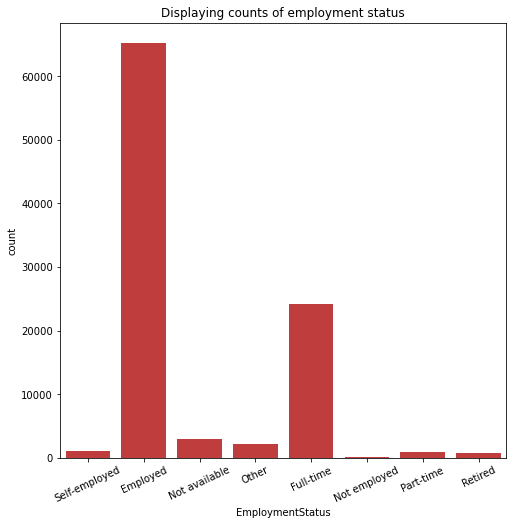

In [37]:
# Plotting countplot.
base_color4 = sns.color_palette()[3]
plt.figure(figsize=(8,8))
sns.countplot(x='EmploymentStatus',data=new_df2,color=base_color4)
plt.xticks(rotation=25)
plt.title('Displaying counts of employment status');

>Borrowers who are Employed are maximum.
Borrowers who are not employed are minimum.

### Let's look at our ninth variable "LoanOriginalAmount".

In [38]:
new_df2['LoanOriginalAmount'].describe()

count    97022.000000
mean      8633.707417
std       6368.804747
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

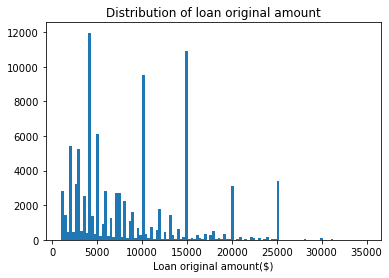

In [39]:
# Plotting histogram.
bins = np.arange(1000,new_df2['LoanOriginalAmount'].max()+40,300)
plt.hist(x='LoanOriginalAmount',data=new_df2,bins=bins)
plt.title('Distribution of loan original amount')
plt.xlabel('Loan original amount($)');

In [40]:
np.log10(new_df2['LoanOriginalAmount'].describe())

count    4.986870
mean     3.936197
std      3.804058
min      3.000000
25%      3.602060
50%      3.845098
75%      4.096910
max      4.544068
Name: LoanOriginalAmount, dtype: float64

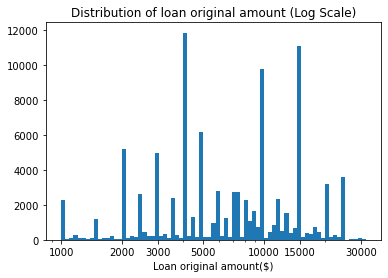

In [41]:
# Again plotting histogram but with log transgormation.
bins = 10** np.arange(3,4.5+0.01,0.02)
tick = [1000,2000,3000,5000,10000,15000,30000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanOriginalAmount',data=new_df2,bins=bins)
plt.xscale('log')
plt.xticks(tick,labels)
plt.title('Distribution of loan original amount (Log Scale)')
plt.xlabel('Loan original amount($)');

>First of all, data is right skewed.<br>
Secondly, from descriptive statistics we can see that minimum loan original amount is 1000 whereas maximum loan original amount is 35000.<br>
Third, from displot we can see that density of data points is highest between approx. 1000 and 8000. This means that the loan original amount taken by the maximum number of borrowers  ranges from approx. 1000 to 8000.

### Let's look at our tenth variable "DebtToIncomeRatio" and try to find hidden pattern in it using plots.

In [42]:
new_df2['DebtToIncomeRatio'].describe()

count    97022.000000
mean         0.273533
std          0.511870
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

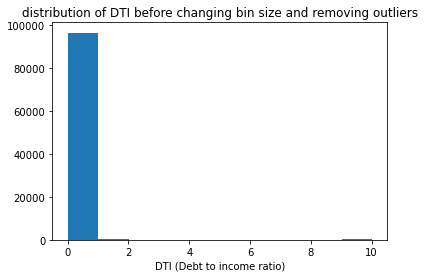

In [43]:
# Plotting histogram
plt.hist(x='DebtToIncomeRatio',data=new_df2)
plt.title('distribution of DTI before changing bin size and removing outliers')
plt.xlabel('DTI (Debt to income ratio)');

>Most of our data falls between 0 and 1. Also, their are some points greater than 1 between 1 and 2, 9 and 10. So, I think these are outliers because highest debttoincome ratio is approx. 50%.

In [44]:
# Select outliers in debt to income ratio with ratio greater than 1.
outliers_dti = (new_df2['DebtToIncomeRatio']>1)

In [45]:
out_df = new_df2.loc[outliers_dti,:]

In [46]:
#Removing outlier from our data.
filter_df = new_df2.loc[-outliers_dti,:]

In [47]:
filter_df.head()

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable     ListingLabels  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

In [48]:
filter_df.shape

(96344, 18)

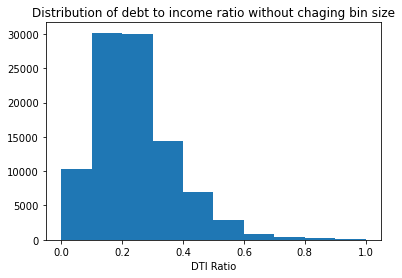

In [49]:
# Plotting histogram after removal of outliers.
plt.hist(x='DebtToIncomeRatio',data=filter_df)
plt.xlabel('DTI Ratio')
plt.title('Distribution of debt to income ratio without chaging bin size');

>DTI Ratio is unimodal but distribution is slightly right skewed. Let's look at the data more closely to see if it holds interesting pattern.

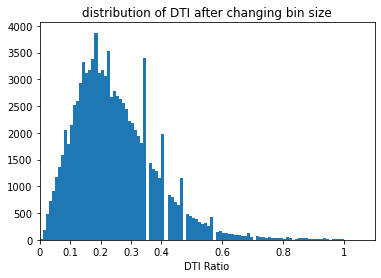

In [50]:
# Plotting a histogram with more number of bins.
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=filter_df,bins=bins)
plt.xlabel('DTI Ratio')
#plt.xscale('log');
plt.xticks(np.array(tick),labels)
plt.xlim(0,1.1)
plt.title('distribution of DTI after changing bin size');

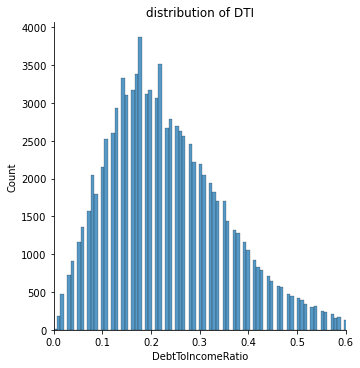

In [51]:
# Plotting displot just to check the distribution of DTI.
sns.displot(x='DebtToIncomeRatio',data=filter_df,kind='hist',rug_kws={'c':'red'})
plt.xlim(0,0.6)
plt.title('distribution of DTI');

>Maximum DTI seems to lie between 0.15 and 0.2 which is quite good DTI. After 0.2 (between 0.22 and 0.25 their is an increase in counts of DTI ratio) count of DTI decreases with a smooth slope.

### Let's look at 'Stated Monthly Income'.

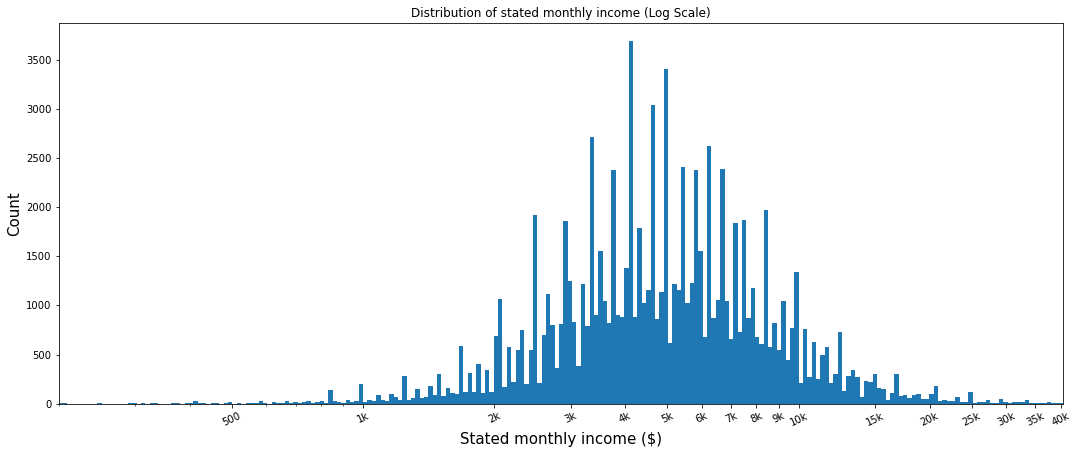

In [52]:
# Plotting histogram by scaling the x-axis to log-type, and changing the axis limit.
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=filter_df,bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([0.001,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of stated monthly income (Log Scale)');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In debt to income variable, their were some points which were greater than 1. So, I considered them as outliers because when I did some research about minimum and maximum DTI, I found that maximum DTI can reach upto 50% or 0.5. So, it is very unlikely that DTI would be greater than 1.<br>
I performed some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.<br>
I did log transformation on stated monthly income. Data was highly right skewed before transformation but after doing transformation I observed that most of the data points are between 2k to 10k approx..

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.<br>
These transformations include:<br>
1- Changing X-ticks to view more exact point of interest.<br>
2- Changing bins size to reduce noise in the graph and view data more precisely.<br>
3- Using log xscale to make interpretations from the graph easy.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [53]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96344 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanKey                    96344 non-null  object 
 1   Term                       96344 non-null  int64  
 2   LoanStatus                 96344 non-null  object 
 3   BorrowerAPR                96344 non-null  float64
 4   BorrowerRate               96344 non-null  float64
 5   ListingCategory (numeric)  96344 non-null  int64  
 6   BorrowerState              96344 non-null  object 
 7   Occupation                 96344 non-null  object 
 8   EmploymentStatus           96344 non-null  object 
 9   LoanOriginalAmount         96344 non-null  int64  
 10  CreditScoreRangeLower      96344 non-null  float64
 11  CreditScoreRangeUpper      96344 non-null  float64
 12  DebtToIncomeRatio          96344 non-null  float64
 13  Investors                  96344 non-null  in

In [54]:
loan_df = filter_df.reset_index()

In [55]:
# Dropping index.
loan_df=loan_df.drop('index',axis=1)

In [56]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanKey                    96344 non-null  object 
 1   Term                       96344 non-null  int64  
 2   LoanStatus                 96344 non-null  object 
 3   BorrowerAPR                96344 non-null  float64
 4   BorrowerRate               96344 non-null  float64
 5   ListingCategory (numeric)  96344 non-null  int64  
 6   BorrowerState              96344 non-null  object 
 7   Occupation                 96344 non-null  object 
 8   EmploymentStatus           96344 non-null  object 
 9   LoanOriginalAmount         96344 non-null  int64  
 10  CreditScoreRangeLower      96344 non-null  float64
 11  CreditScoreRangeUpper      96344 non-null  float64
 12  DebtToIncomeRatio          96344 non-null  float64
 13  Investors                  96344 non-null  int

__Let's first find the correlation using heatmap and pair grid between numeric variables present in our dataset.__

In [57]:
# Making a list of all numerical variables.
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome']

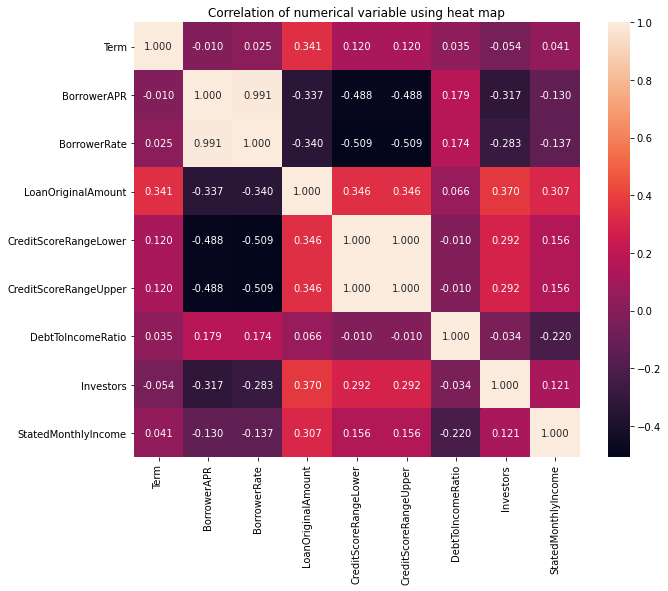

In [58]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sns.heatmap(data=loan_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variable using heat map');

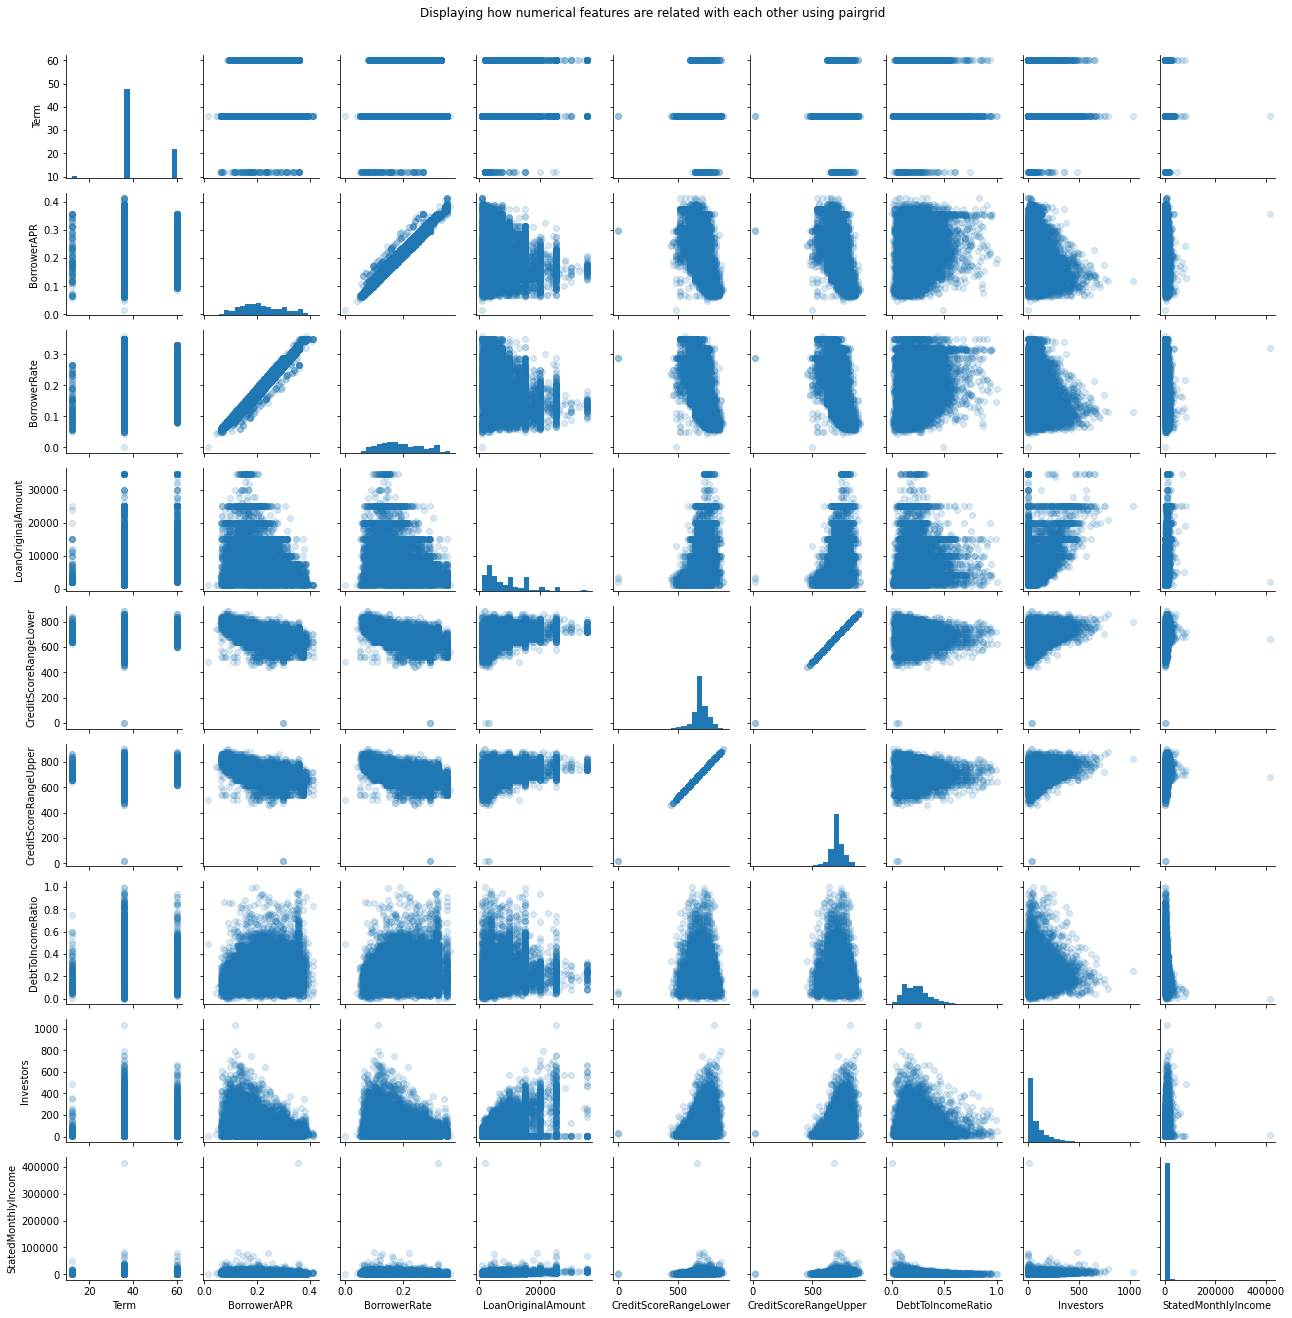

In [59]:
# plot matrix: sample 500 loans so that plots are clearer.
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]
pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height=2)
pg = pg.map_diag(plt.hist, bins = 20)
pg.map_offdiag(plt.scatter,alpha=1/6)
pg.fig.suptitle('Displaying how numerical features are related with each other using pairgrid',y=1.02);

>From the above two graphs, I have concluded several points:<br>
1- Borrower APR is highly correlated with Borrower Rate.<br>
2- If borrower rate increases borrower APR will also increase and vice-versa.<br>
3- There is a moderate correlation between investors and Loan original amount.<br>
4- It is strange that debt to income ratio is very low correlated with every other variable. It could be due to not including large number of features from main dataframe 'df'. But I will try to explore this feature with categorical variables. Also, if we look at the DTI (debt to income ratio) graph (pairplot) and compare it with the graphs of borrower APR and borrower Rate, we can observe that their is some correlation between these variables.<br>
5- Their seem to be some outliers present in credit score range upper and credit score range lower variables. I will remove them and than again plot the pairgrid to see the correlation.<br>
6- Their is moderate negative correlation between loan original amount and Borrower APR, Borrower Rate variables.

__Removing outliers from credit score range upper and credit score range lower variables with values below 300.__

In [60]:
loan_df[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe()

CreditScoreRangeLower  CreditScoreRangeUpper
count           96344.000000           96344.000000
mean              688.809267             707.809267
std                60.978684              60.978684
min                 0.000000              19.000000
25%               660.000000             679.000000
50%               680.000000             699.000000
75%               720.000000             739.000000
max               880.000000             899.000000

In [61]:
# Selecting outliers with credit score range for both, lower and upper, less than 300.
outlier_data = (loan_df['CreditScoreRangeLower']<300) | (loan_df['CreditScoreRangeUpper']<300)

In [62]:
# Removing outliers from data.
loan_df=loan_df.loc[-outlier_data,:]

In [63]:
loan_df = loan_df.reset_index()

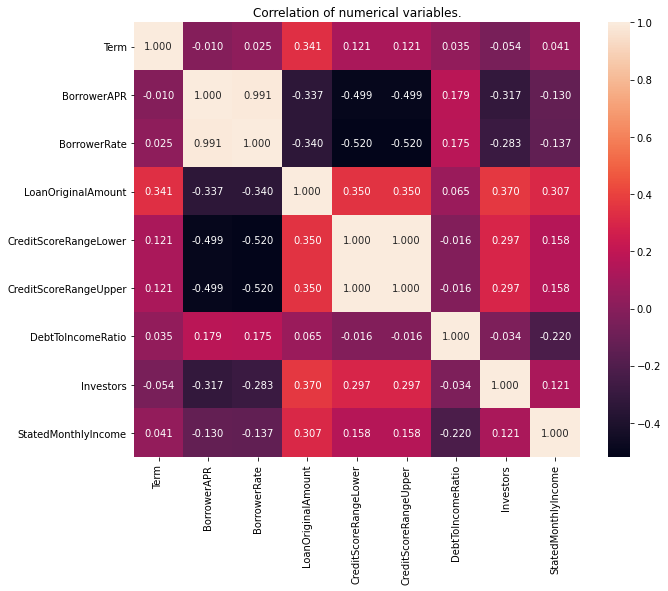

In [64]:
# Plotting heat map without outliers in our dataset.
plt.figure(figsize=(10,8))
sns.heatmap(data=loan_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variables.');

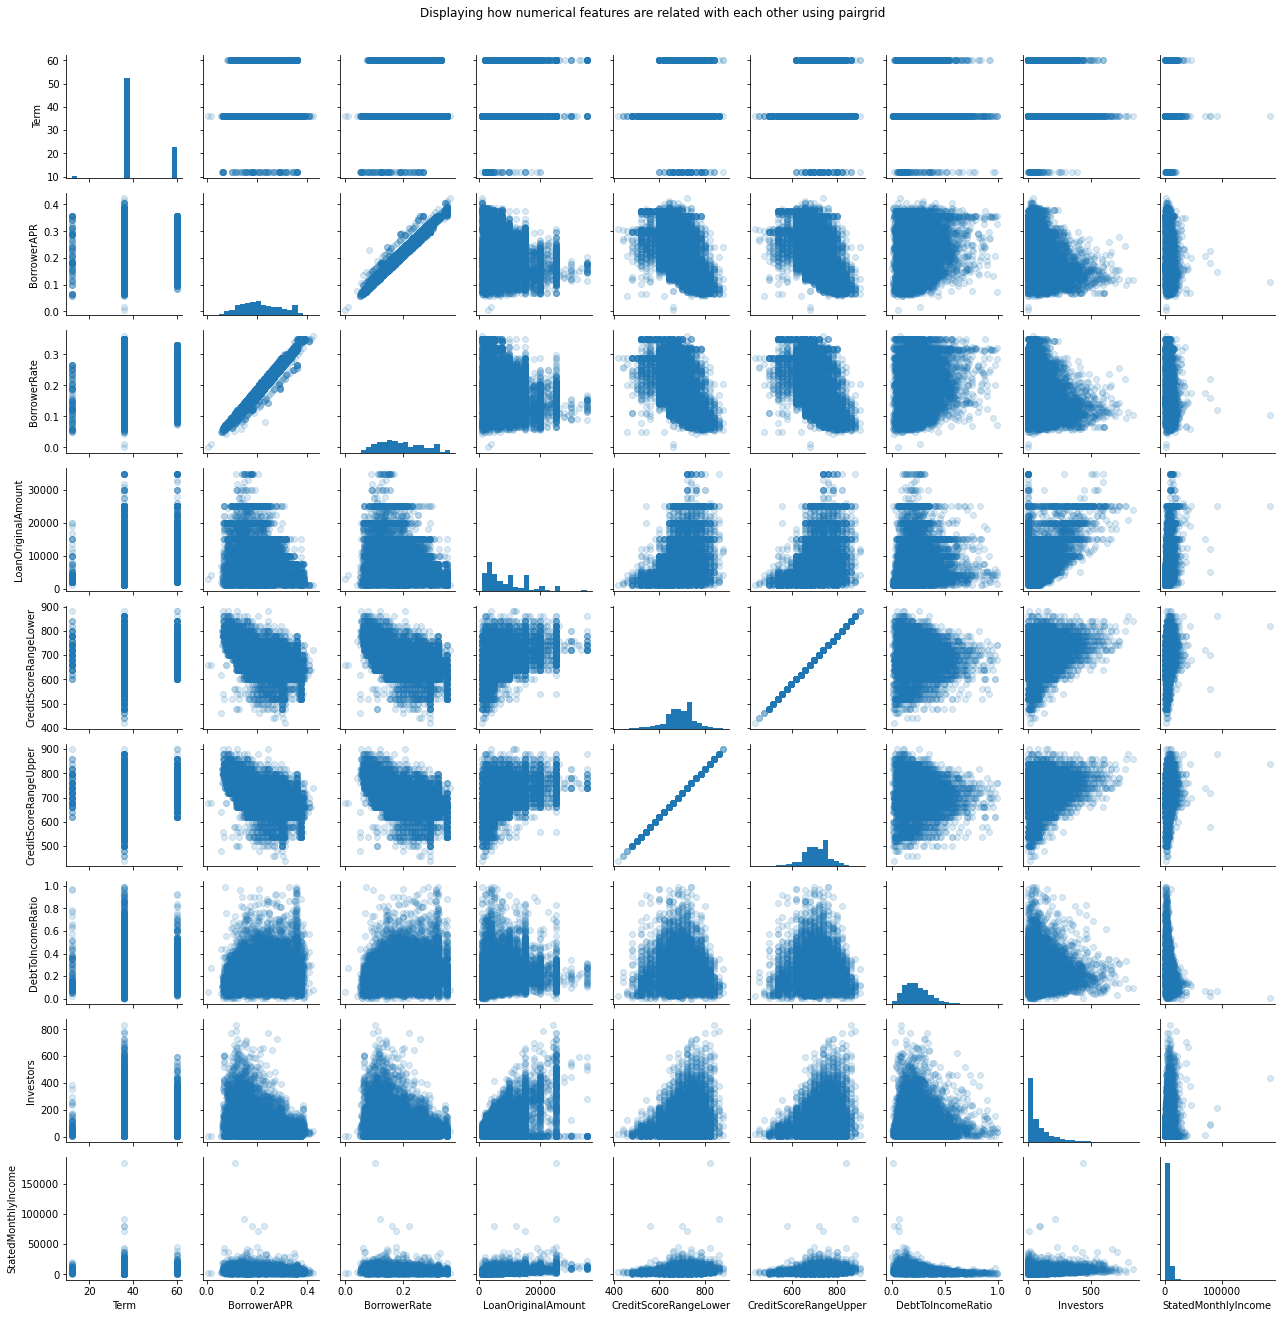

In [65]:
# plot matrix: sample 500 loans so that plots are clearer.
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]
pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height=2)
pg = pg.map_diag(plt.hist, bins = 20)
pg.map_offdiag(plt.scatter,alpha=1/6)
pg.fig.suptitle('Displaying how numerical features are related with each other using pairgrid',y=1.02);

> After removing outliers, I have concluded several points:<br>
1- We can see the moderate negative correlation between investors and Borrower APR, Rate variable more clearly.<br>
2- Also, we can see the moderate negative correlation of credit score lower and upper range with both Borrower APR, Rate variables more clearly.<br>
3- We can clearly see the moderate positive correlation between loan original amount and Credit score lower and upper.<br>
4- Debt to income ratio is moderately negatively correlated with stated monthly income.

- Exceptional: 800 to 850. FICO® Scores ranging from 800 to 850 are considered exceptional. ...
- Very good: 740 to 799. FICO® Scores in the 740 to 799 range are deemed very good. ...
- Good: 670 to 739. FICO® Scores in the range of 670 to 739 are rated good. ...
- Fair: 580 to 669. ...
- Poor: 300 to 579.

In [66]:
# Converting credit score range from numerical dataype to categorical data type.
cs = np.array(loan_df['CreditScoreRangeLower'])
# Dictionary of class (key) associated with its range of credit score (value).
d = {'Exceptional':np.arange(800,881,1),'Very Good':np.arange(740,800,1),'Good':np.arange(670,740,1),'Fair':np.arange(580,670,1),'Poor':np.arange(300,580,1)}
l=[]
ns=[]
for i in range(cs.shape[0]):
    for key,val in d.items():
        if cs[i] in val:
            l.append(key)
loan_df=loan_df.assign(credit_score_class=l)
# Convertin dataype to categorical.
credit_class=['Poor','Fair','Good','Very Good','Exceptional']
t=pd.api.types.CategoricalDtype(categories=credit_class,ordered=True)
loan_df['credit_score_class']=loan_df['credit_score_class'].astype(t)

### Let's take a look at 'Borrower APR' and 'credit score class' variable.

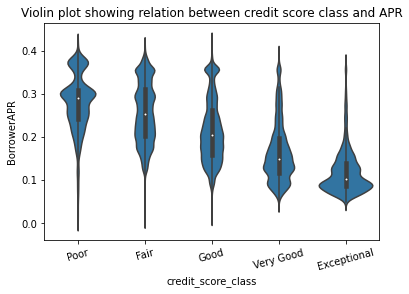

In [67]:
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
base_c=sns.color_palette()[0]
sns.violinplot(data=loan_df, x='credit_score_class', y='BorrowerAPR', color=base_c, innner=None)
plt.xticks(rotation=15)
plt.title('Violin plot showing relation between credit score class and APR');

### Let's take a look at 'Borrower APR' and 'loan status' variable.

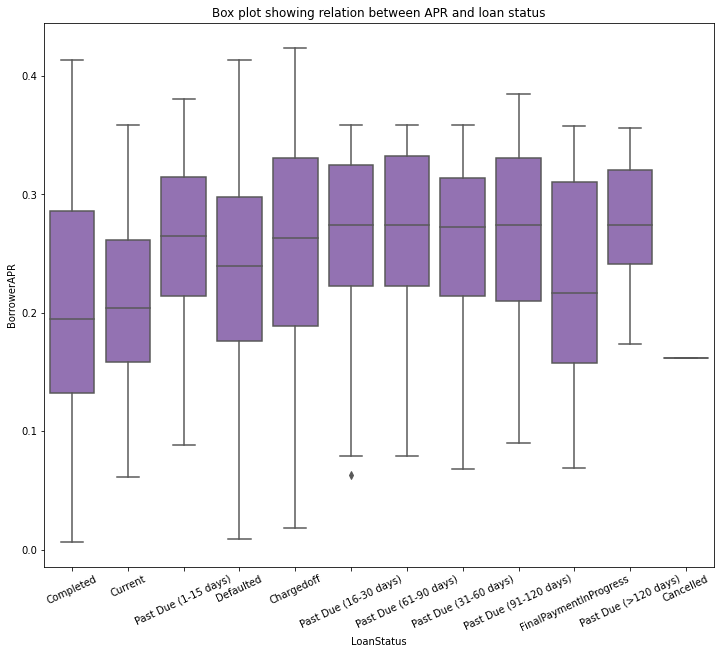

In [68]:
# Plotting boxplot.
plt.figure(figsize=(12,10))
base_c = sns.color_palette()[4]
sns.boxplot(x='LoanStatus',y='BorrowerAPR',data=loan_df,color=base_c)
plt.xticks(rotation=25)
plt.title('Box plot showing relation between APR and loan status');

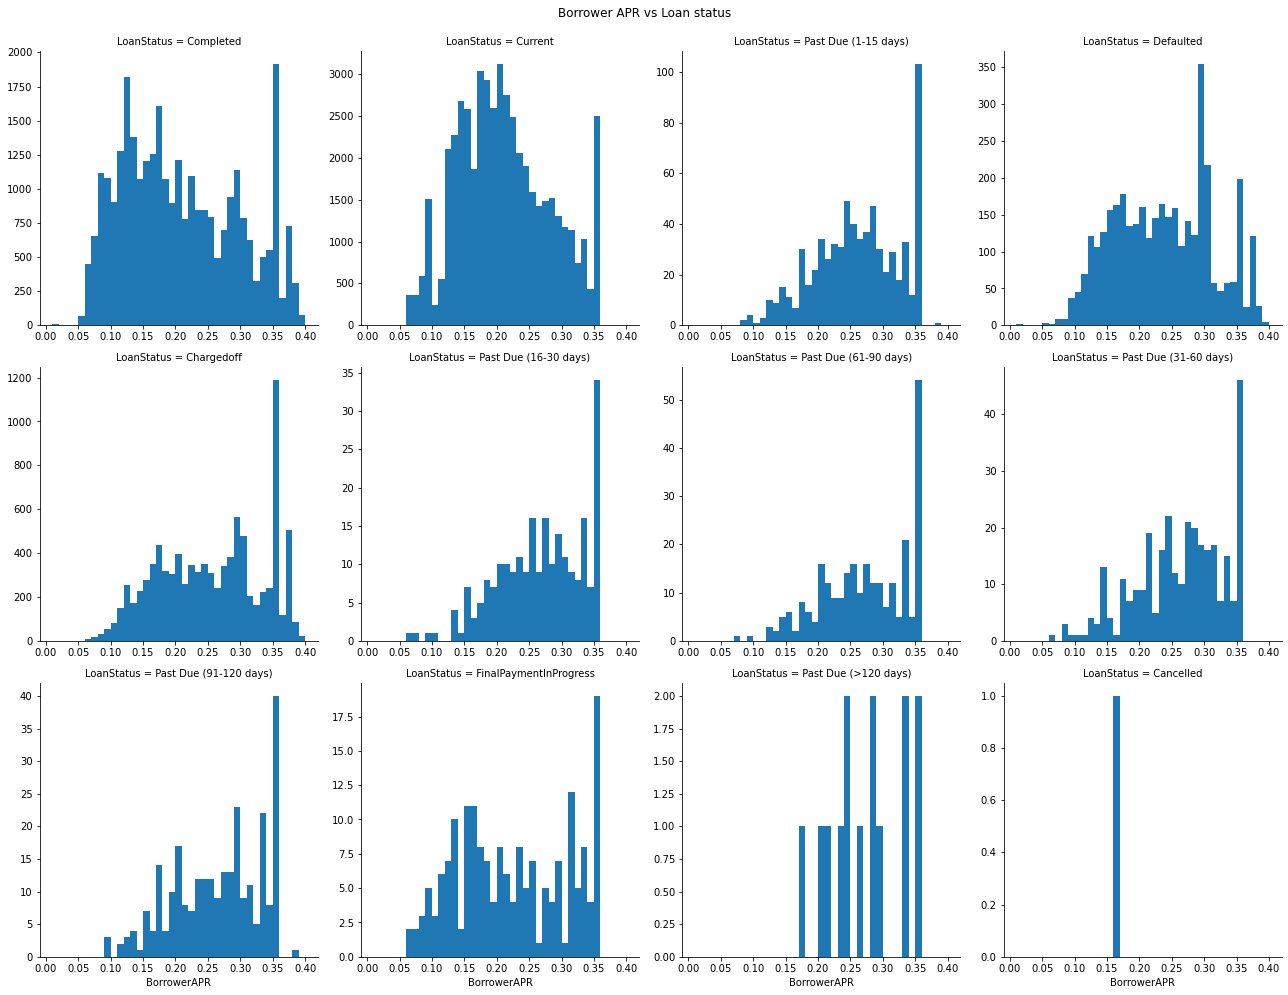

In [69]:
# Plotting histogram with seaborn's facetgrid function.
bins = np.arange(0.01,0.4+0.01,0.01)
f=sns.FacetGrid(data=loan_df,col='LoanStatus',col_wrap=4,sharey=False,sharex=False,height=4.5)
f.map(plt.hist,'BorrowerAPR',bins=bins)
f.fig.suptitle('Borrower APR vs Loan status',y=1.02);

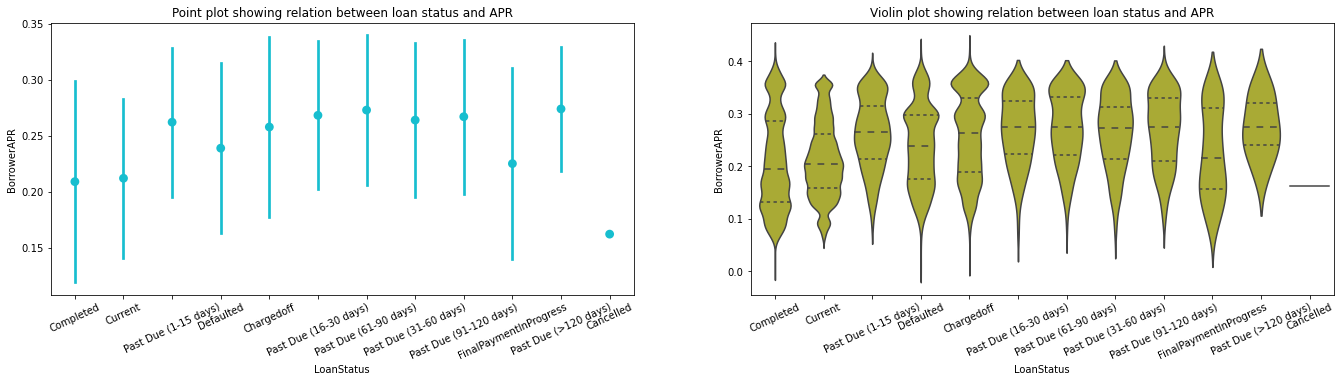

In [70]:
# Plotting pointplot
plt.figure(figsize=(23,5))
plt.subplot(1,2,1)
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[8]
sns.pointplot(data=loan_df,x='LoanStatus',y='BorrowerAPR',join=False,ci='sd',color=base_c)
plt.xticks(rotation=25)
plt.title('Point plot showing relation between loan status and APR')
# plotting violin plot.
plt.subplot(1,2,2)
sns.violinplot(data=loan_df,x='LoanStatus',y='BorrowerAPR',inner='quartile',color=base_c2)
plt.xticks(rotation=25)
plt.title('Violin plot showing relation between loan status and APR');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>From the above four plots that is boxplot,histogram and pointplot I have gather some points which are discussed below:<br>
- Loan status- "Completed" has the lowest APR (approx. 0.02). Also, median of APR for "completed" variable is approx. 0.2 which is still the lowest. Moreover, most of the APR values lie between first quertile (approx. 0.14 APR) and second quertile (approx. 0.20 APR). However, maximum APR lie just above 0.4.<br>
- Loan Status- "Current" variable's median is approx. 0.22 APR which is second lowest after "Completed" loan status. Lowest APR is approx. 0.05 and highest APR is 0.36. Distribution is left skewed a little bit. From violin plot we can see that most of the APR values lie between first quartile and second quartile ranging from approx. 0.13 to 0.23. Also, data is unimodal having one peak. <br>
- Loan Status- "Past Due (1-15 days)" Distribution is left skewed with lowest whisker length extends to approx. 0.08 APR and maximum whisker length extends to approx. 0.38. Median is approx. 0.26 and data is slightly unimodal having one peak.<br>
- Loan Status- "Defaulted" Distribution is left skewed and data is unimodal having one peak. Minimum APR is approx. 0.03 and maximum APR is approx. 0.42. Desnity of APR is greatest between 0.23 and 0.32 APR values and nearly equal number of APR values lie between first quartile and median as compare to count of APR values between second quartile and third quartile.<br>
- Loan Status- 'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)','Past Due (31-60 days)', 'Past Due (91-120 days)' Distribution is left skewed and data is unimodal. Minimum value is approx. 0.03,0.07, 0.07, 0.06, 0.08 respectively. Maximum value is approx. 0.43 (greatest APR), 0.36,0.36,0.36,0.38 respectively. Median is approx 0.27,0.28,0.28,0.28,0.28 respectively.<br>
- Loan Status- 'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled' Distribution for 'FinalPaymentInProgress' is left skewed and data is unimodal with only one peak. For 'Past Due (>120 days)' variable, distribution is left skewed but data is multimodal having multiple peaks. Data in 'Past Due (>120 days)' seems to be less compared to other features. This could mean that very few borrowers who took loans had loan status of 'Past Due (>120 days)'. On the other hand, "cancelled" variable had only one value which is approx. 0.18 APR which means only one borrowers's loan was cancelled. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some Loan status have high APR values and one loan status is cancelled with APR value of 0.18 approx. So, I will try to find why some loan status have high APR. Also, what features are responsible for high APR of loan status. By doing so we can avoid giving loans to borrowers on the basis of several features.

### Let's take a look at 'Borrower APR' and 'Borrower Rate' variable.

In [117]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loan_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loan_df[f'{lab} cat'] = pd.cut(x=loan_df[lab],bins=bins,labels=bins[1:],include_lowest=False)

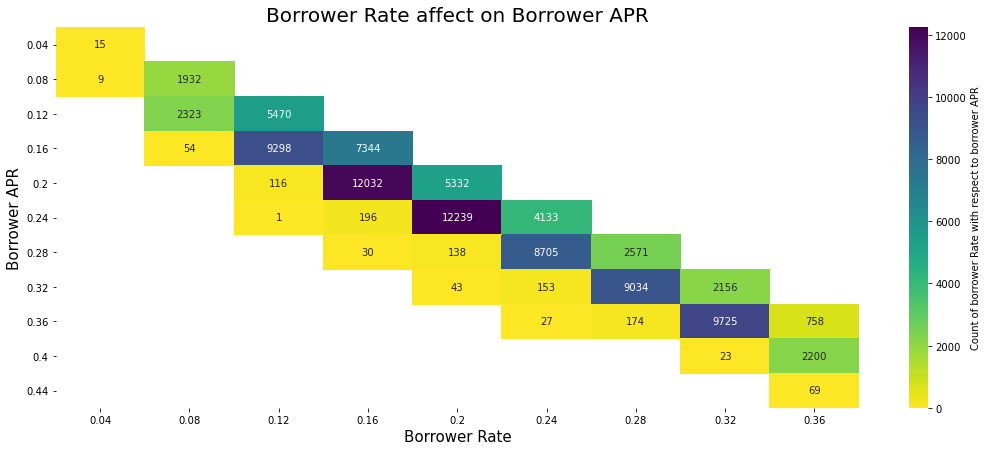

In [119]:
plt.figure(figsize=(18, 7))
sns.heatmap(loan_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate affect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

> From above heat map I have made several observations:
> - Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR than Borrower Rate will also increase and vice-versa.<br>
> - Maximum borrowers have APR and Rate between 0.1 and 0.2.(see dark portion)<br>
> - Between 0.05 and 0.2, count of borrower APR and borrower Rate increases. Between 0.2 and 0.35 count of borrower APR and rate decreases.

### Let's take a look at 'Borrower APR' and 'Loan Term' quantitative variables.

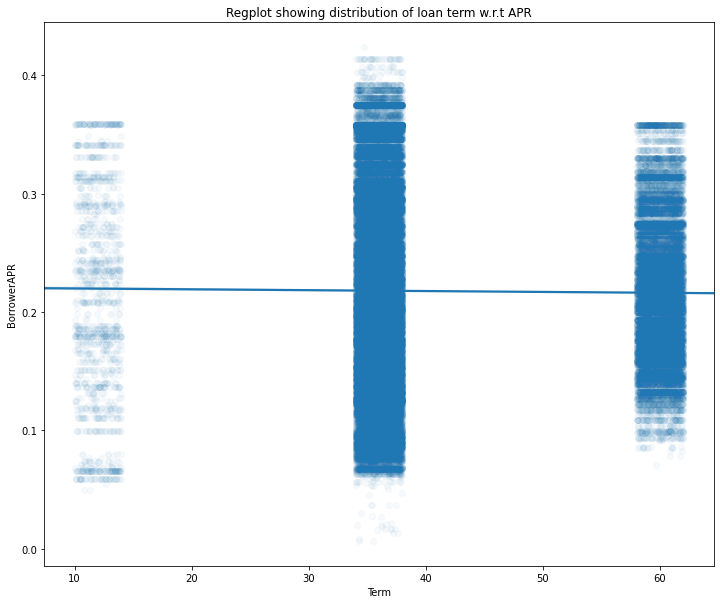

In [72]:
# Plotting regplot.
plt.figure(figsize=(12,10))
sns.regplot(data = loan_df, x = 'Term', y = 'BorrowerAPR', truncate=False, x_jitter=2,scatter_kws={'alpha':1/30})
plt.title('Regplot showing distribution of loan term w.r.t APR');

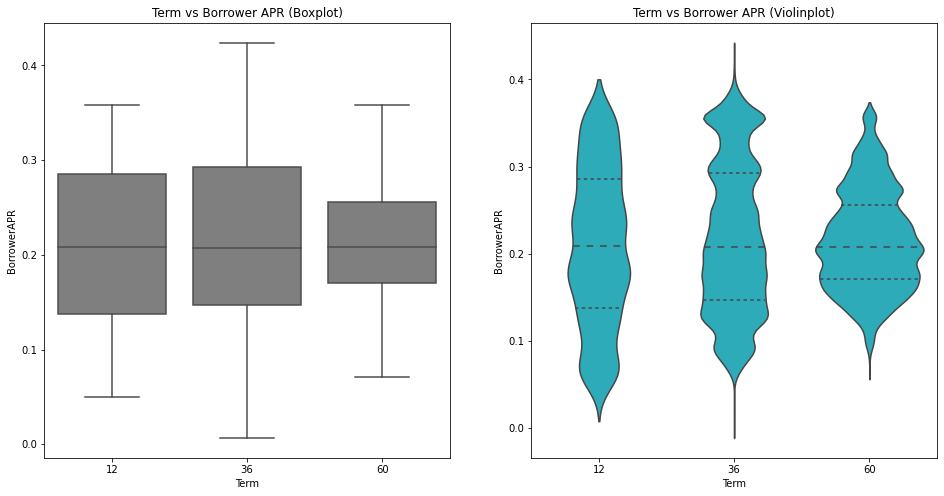

In [73]:
plt.figure(figsize=(16,8))
# Plotting boxplot.
plt.subplot(1,2,1)
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[7]
sns.boxplot(x='Term',y='BorrowerAPR',data=loan_df,color=base_c2)
plt.title('Term vs Borrower APR (Boxplot)')
# Plotting violinplot.
plt.subplot(1,2,2)
sns.violinplot(x='Term',y='BorrowerAPR',data=loan_df,color=base_c,inner='quartile')
plt.title('Term vs Borrower APR (Violinplot)');

> I have made several observations from above three plots:
> - Maximum number of borrowers took loan for 36 months.
> - Also, count of borrower APR is maximum at 36 months because of first observation.
> - Using box plot I observed that at 36 month distribution of Borrower APR is slightly left skewed.
> - Also, median falls at 0.2 approx which is close to first quartile. This could mean that maximum borrowers who took loan for 36 months had APR between 0.16 and 0.2 approx. which is quite good compare to other borrowers APR which falls between 0.21 and 0.3 approx.
> - Minimum APR is 0.01 approx. at 36 month term which is a good sign.
> - Maximum APR is above 0.4 at 36 month term which is considered as bad news.
> - Second highest count of borrowers who took loan is for 60 month term.
> - Using boxplot I see that distribution is slightly left skewed.
> - Using violin plot, I observed that density of APR values is higher between first and second quartile (0.18-0.21 approx.) compare to the density of APR values between second and third quartile. I think range is also less for Borrower APR at 60.
> - Minimum APR is 0.08 approx. which is again a good news.
> - Maximum APR is 0.36 approx. which is again a bad news.
> - Lastly, our count of borrowers who took loan for 12 months is lowest.(Reg plot).
> - Distribution at 12 month term seems to be normally distributed which means 50% of data falls below mean and 50% of data fall above mean.
> - Mean of APR is approx. 0.22 at 12 month term.
> - Smallest APR is 0.05 approx. (good news) and largest APR is 0.36 approx. (bad news).<br><br>
>Does Borrower APR depends on loan original amount? Lets answer this question in our next bivariate analysis.

### Let's take a look at 'Borrower APR' and 'Loan original amount' quantitative variables.

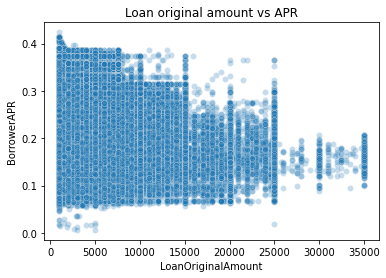

In [74]:
# Plotting scatter plot.
sns.scatterplot(x='LoanOriginalAmount',y='BorrowerAPR',data=loan_df,x_jitter=0.3,alpha=1/4)
plt.title('Loan original amount vs APR');

From above scatter plot, although, we can see that their is a gradual decrease in Borrower APR with loan amount still it does not give a clear picture of count of APR between a given range of loan amount.<br>
Let's try to plot a heat map.

_Let's add annotations and transform x-axis and y-axis bins to get more accurate data representation.__

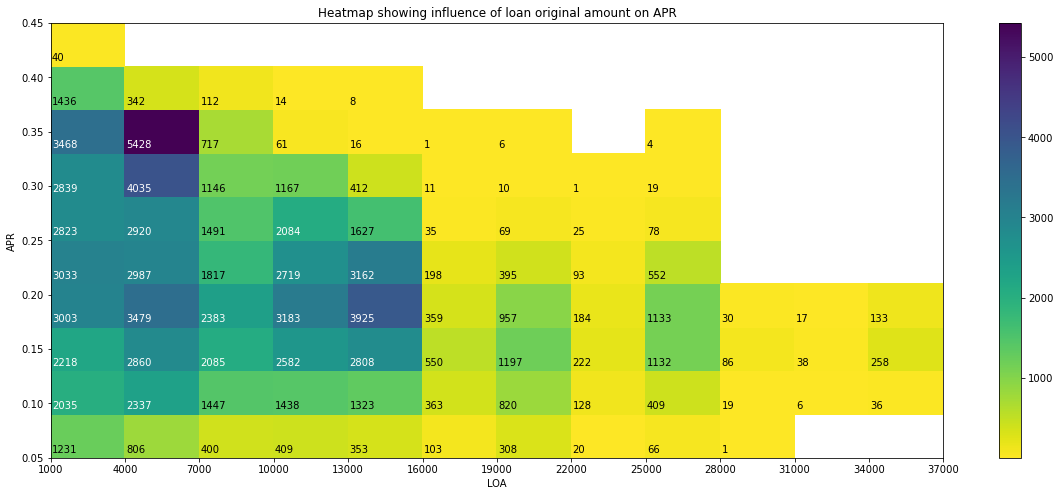

In [75]:
plt.figure(figsize=(20,8))
bins_x2 = np.arange(1000,35000+5000,3000)
bins_y2=np.arange(0.05,0.40+0.06,0.04)
labels = ['{}'.format(x) for x in bins_x2]
gt = plt.hist2d(y='BorrowerAPR',x='LoanOriginalAmount',data=loan_df,cmin=0.5,cmap='viridis_r',bins=[bins_x2,bins_y2])
count = gt[0]
for i in range(count.shape[0]):
    for j in range(count.shape[1]):
        annot = count[i,j]
        if annot!=np.nan and annot >= 2000:
            plt.text(x=gt[1][i]+50,y=gt[2][j]+0.005,s=int(annot),color='white')
        elif annot !=np.nan and annot > 0:
             plt.text(x=gt[1][i]+50,y=gt[2][j]+0.005,s=int(annot),color='black')
plt.colorbar()
plt.xticks(bins_x2,labels)
plt.title('Heatmap showing influence of loan original amount on APR')
plt.xlabel('LOA')
plt.ylabel('APR');

> Using the above heatmap, following observations have been made:
> - Count of borrowers APR between 1000-7000 approx. is highest.
> - Highest count of APR between 1000-7000 is 5428 which is situated at 0.35 approx.
> - As loan original amount is increasing, borrower APR is decreasing and count of borrower APR is decreasing too. (yellow boxes after 16000 loan amount)<br><br>
It is now getting more clear that the borrowers who took small amount of loans have highest count as well as have highest APR values. But I want to see why borrowers with small loan amount have high APR and also what are the reasons behind it?. Is it because of type of loan or because of high debt to income ratio or due to occupation etc.

### Let's take a look at 'Employment status' ,'Borrower APR' and 'Loan original amount' qualitative and quantitative variables respectively.

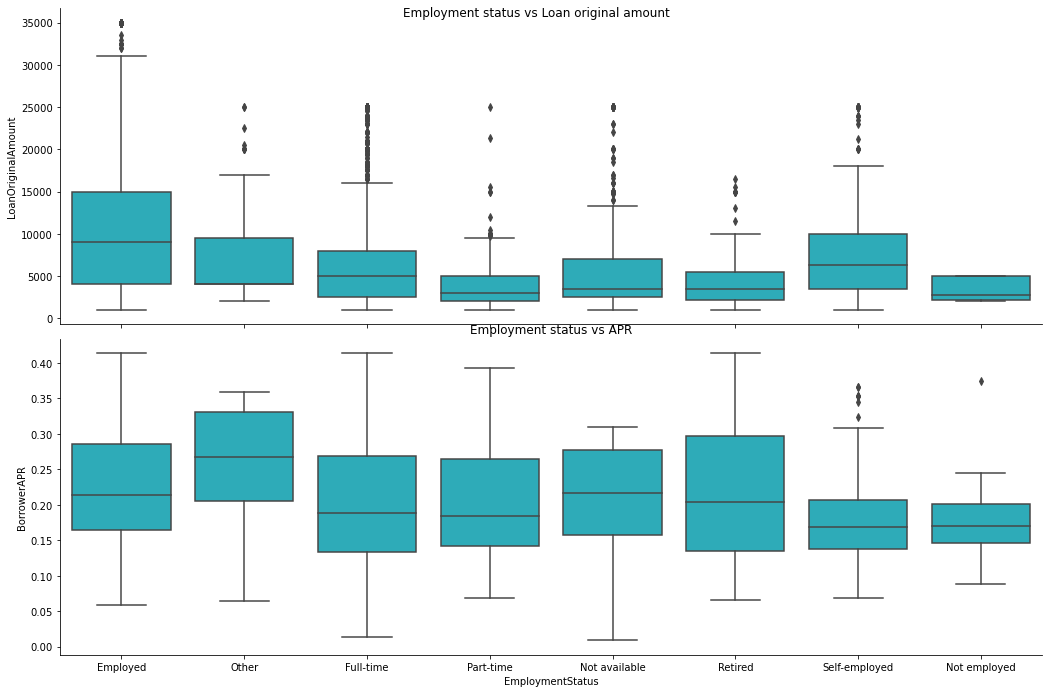

In [76]:
# plotting box plot.
samples = np.random.choice(loan_df.shape[0], 20000, replace = False)
loan_samp = loan_df.loc[samples,:]
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[5]
g = sns.PairGrid(data = loan_samp, y_vars = ['LoanOriginalAmount','BorrowerAPR'], x_vars = 'EmploymentStatus',height = 4.9,diag_sharey=False, aspect = 3)
g.map(sns.boxplot,color=base_c)
g.fig.suptitle('Employment status vs Loan original amount')
plt.title('Employment status vs APR')
plt.show()
# plotting countplot.

__Plotting for borrower APR > 0.2 as any value above 0.2 or 20% is considered as bad APR normally.__

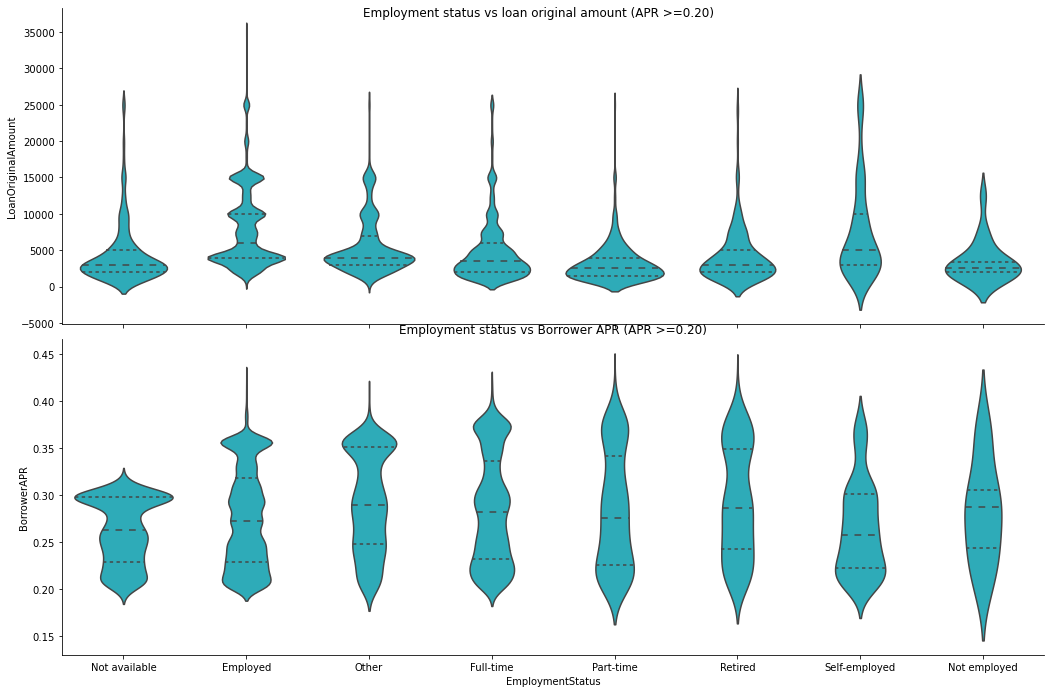

In [77]:
# Plotting violin plot using seaborn's pairgrid with APR values >=0.20.
bad_apr = loan_df[loan_df['BorrowerAPR']>=0.2]
#samples = np.random.choice(loan_df.shape[0], 20000, replace = False)
#loan_samp = loan_df.loc[samples,:]
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[5]
g = sns.PairGrid(data = bad_apr, y_vars = ['LoanOriginalAmount','BorrowerAPR'], x_vars = 'EmploymentStatus',height = 4.9,diag_sharey=False, aspect = 3)
g.map(sns.violinplot,inner='quartile',color=base_c)
g.fig.suptitle('Employment status vs loan original amount (APR >=0.20)')
plt.title('Employment status vs Borrower APR (APR >=0.20)')
plt.show()

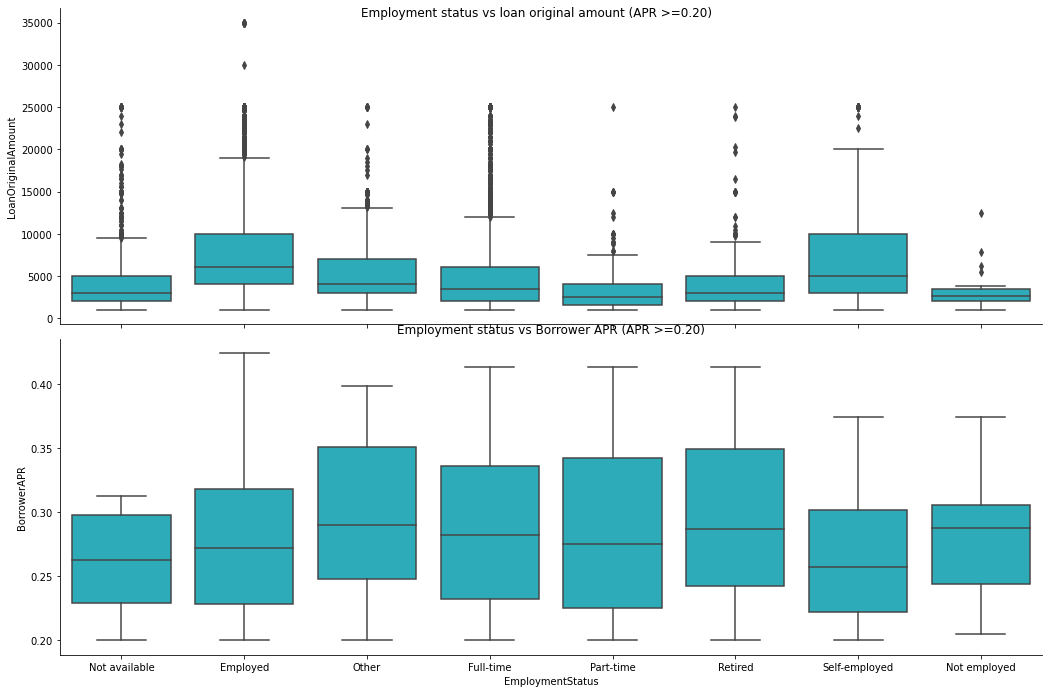

In [78]:
# Plotting box plot using seaborn's pairgrid with APR values >0.20.
bad_apr = loan_df[loan_df['BorrowerAPR']>=0.2]
#samples = np.random.choice(loan_df.shape[0], 20000, replace = False)
#loan_samp = loan_df.loc[samples,:]
base_c=sns.color_palette()[9]
g = sns.PairGrid(data = bad_apr, y_vars = ['LoanOriginalAmount','BorrowerAPR'], x_vars = 'EmploymentStatus',height = 4.9,diag_sharey=False, aspect = 3)
g.map(sns.boxplot,color=base_c)
g.fig.suptitle('Employment status vs loan original amount (APR >=0.20)')
plt.title('Employment status vs Borrower APR (APR >=0.20)')
plt.show()

> - For every employment status most of the loan original amount is between 1000 and 5000.
> - Not employed status has the least count but their APR ranges from 0.15 to 0.42 approx. Also, most of the APR values lie between median (second quartile 0.28 approx.) and third quartile (0.32 approx.).
> - Not available status has 1647 counts whose APR is >= 0.20. Most of the APR values are present between 0.28 and 0.32.<br><br>
> Nearly for every employment status, most of the loan amount lies in same range and also, borrowers who are employed seems to have APR normally distributed compare to other borrowers APR.<br><br>
__So, according to me, considering employment status is not a good idea to find out that why borrower APR is high for some loan amount and low for another and also what affects borrower APR. I will try to explore other categorical variables and compare them with borrower APR and Borrower Rate furhter in my exploratory analysis.__

### Let's take a look at 'Occupation' ,'Borrower APR'  qualitative and quantitative variables respectively.

In [79]:
# Grouping data by 'Occupation' variable and calculating avergae borrower APR for each occupation.
occ_apr=loan_df.groupby('Occupation')['BorrowerAPR'].mean().reset_index()

In [80]:
occ_apr

Occupation  BorrowerAPR
0             Accountant/CPA     0.208621
1   Administrative Assistant     0.240964
2                    Analyst     0.201773
3                  Architect     0.189130
4                   Attorney     0.189071
..                       ...          ...
62   Tradesman - Electrician     0.212326
63      Tradesman - Mechanic     0.220717
64       Tradesman - Plumber     0.214175
65              Truck Driver     0.224521
66           Waiter/Waitress     0.237010

[67 rows x 2 columns]

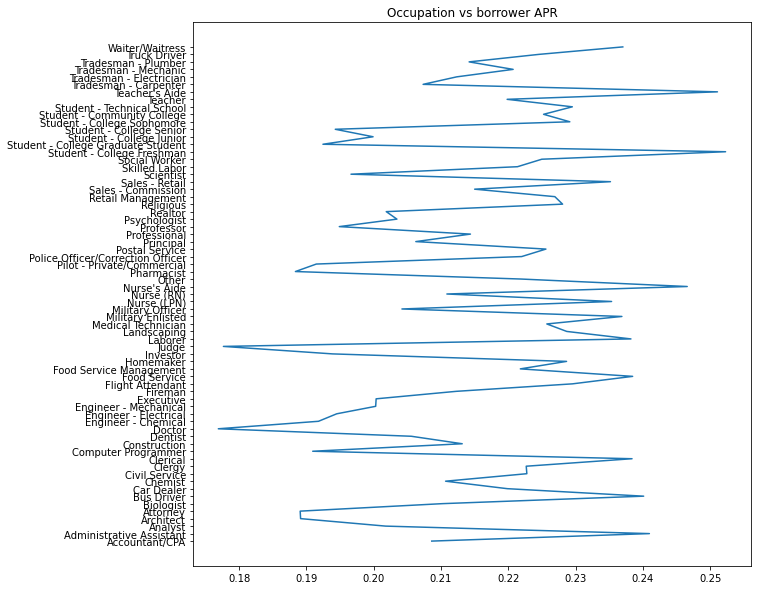

In [81]:
# Plotting line plot.
plt.figure(figsize=(10,10))
plt.errorbar(y='Occupation', x='BorrowerAPR', data=occ_apr)
plt.title('Occupation vs borrower APR');

From the above plot we can cannot make clear interpretation abount which occupations have low average apr and which has highest APR.

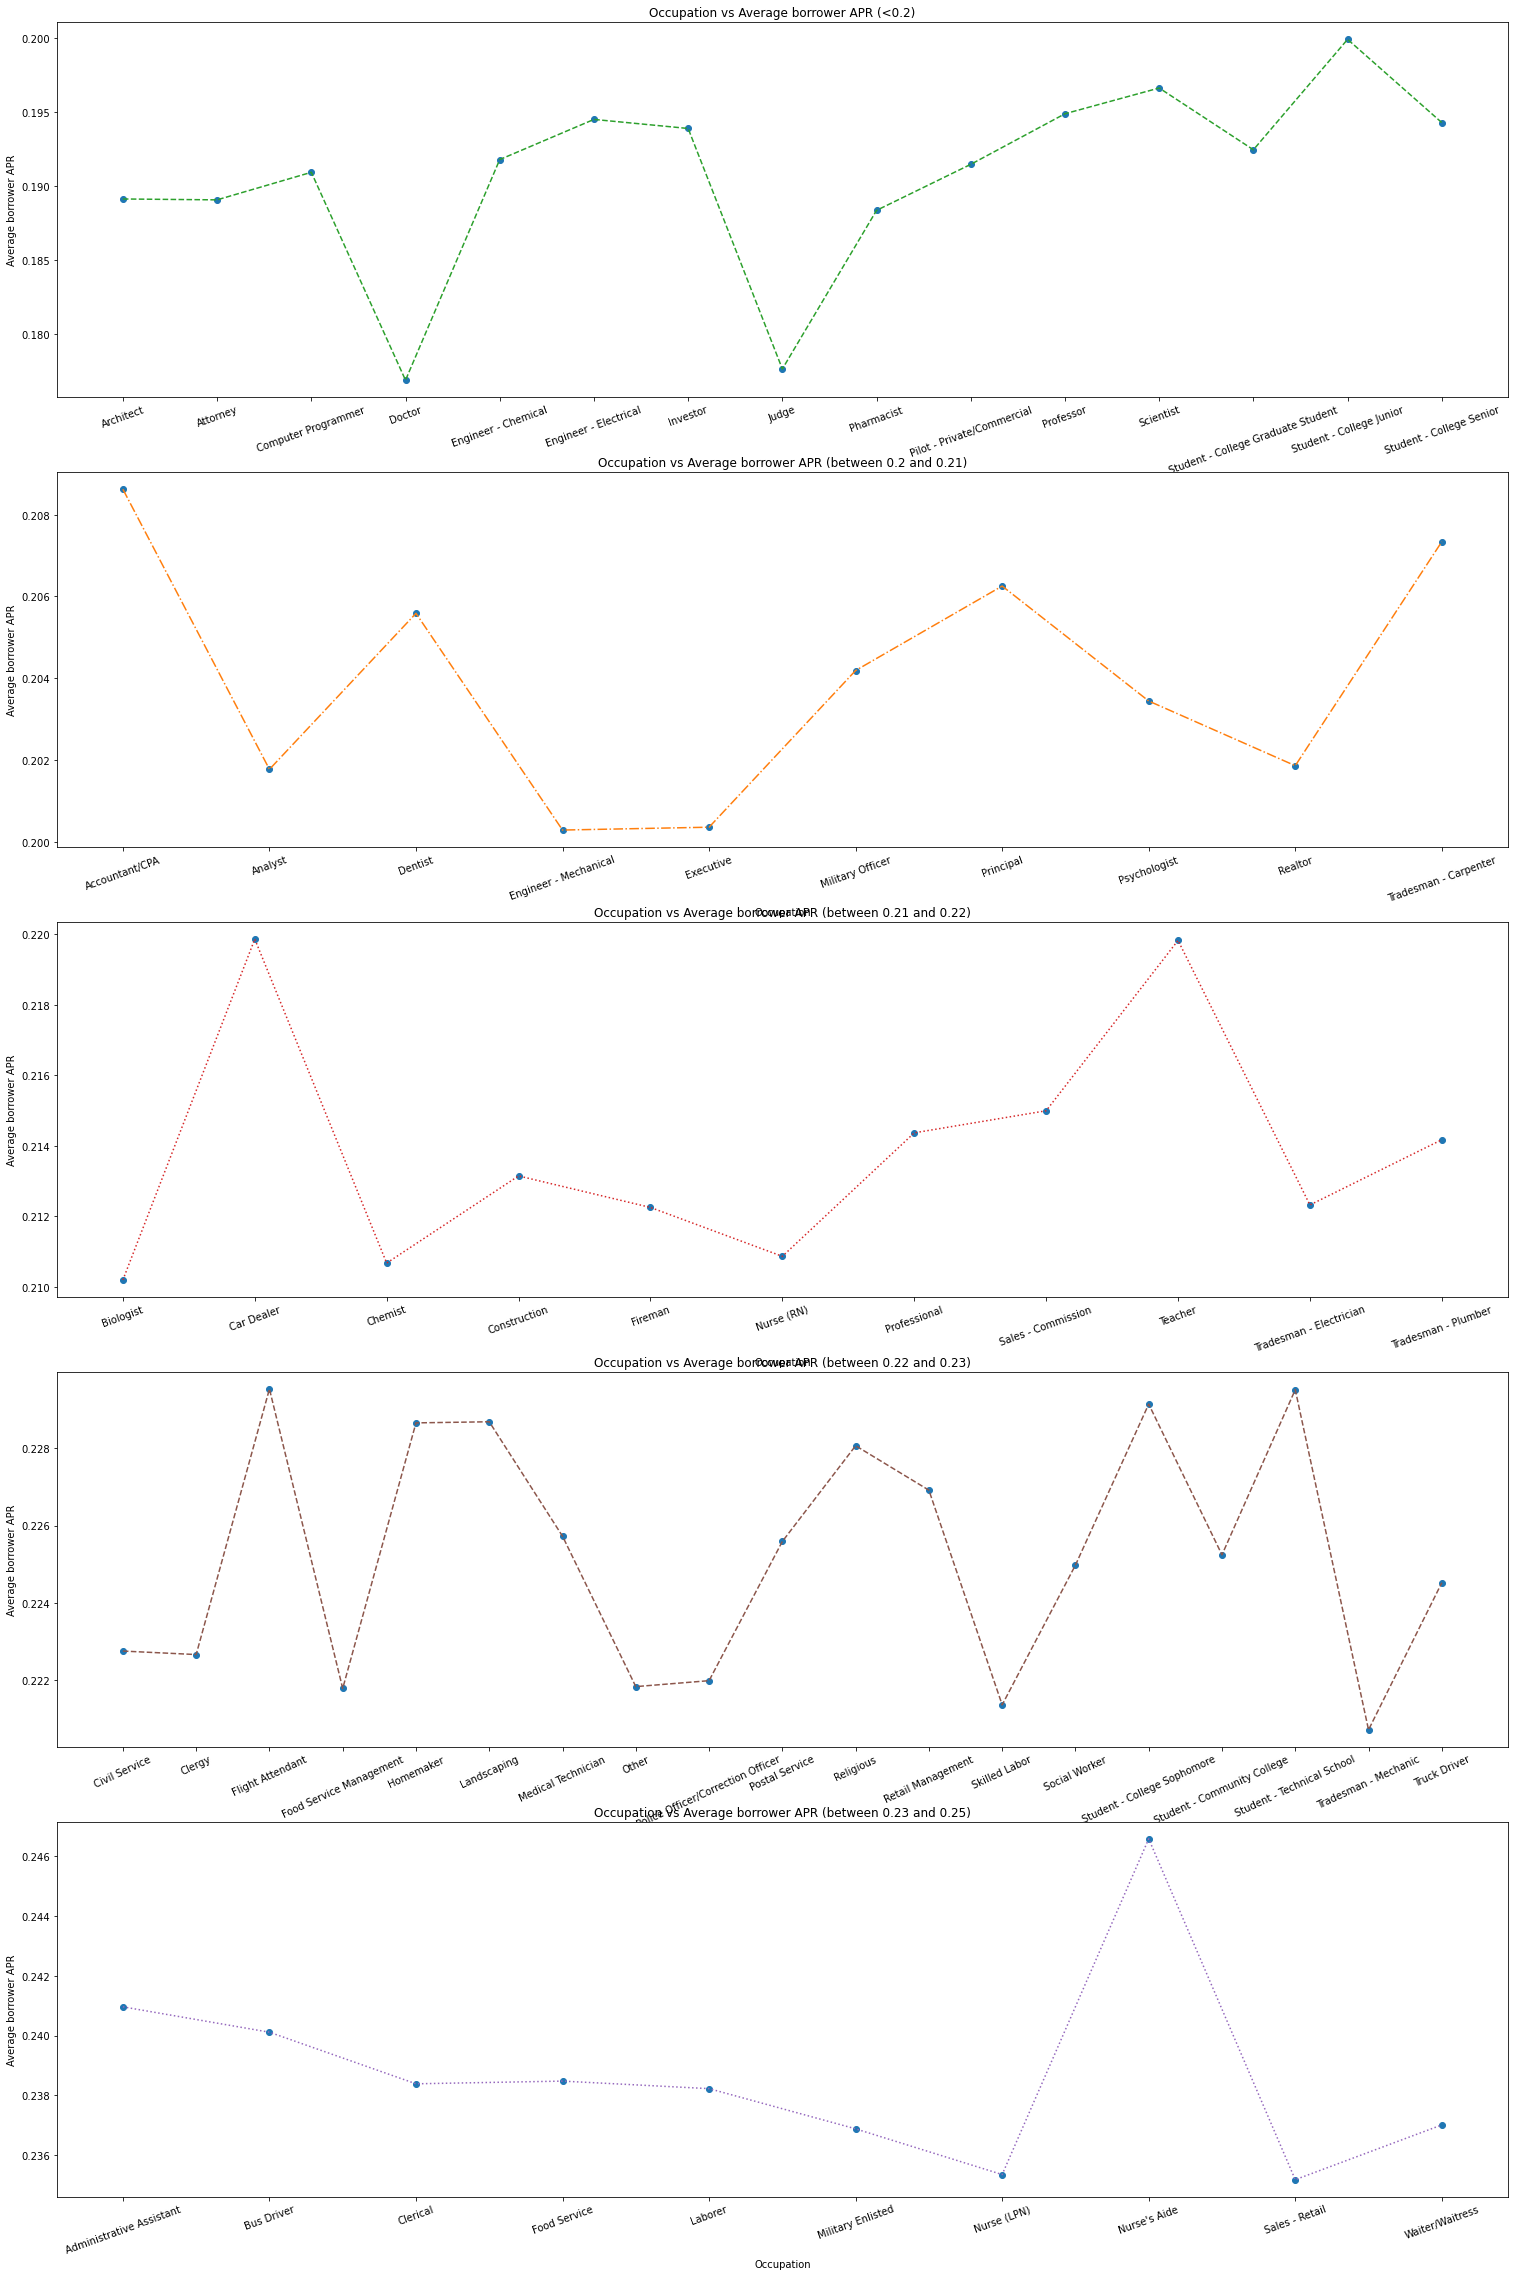

In [82]:
# Plotting line plots for fiiferent APRs.
# Function to assign different color palettes to line plot
def base_color(c=0):
    l = sns.color_palette()[c]
    return l
filter1=occ_apr[occ_apr['BorrowerAPR']<0.2]
f2 = occ_apr['BorrowerAPR'].between(0.2,0.21,inclusive=False)
filter2 = occ_apr.loc[f2,:]
f3 = occ_apr['BorrowerAPR'].between(0.21,0.22,inclusive=False)
filter3 = occ_apr.loc[f3,:]
f4 = occ_apr['BorrowerAPR'].between(0.22,0.23,inclusive=False)
filter4 = occ_apr.loc[f4,:]
f5 = occ_apr['BorrowerAPR'].between(0.23,0.25,inclusive=False)
filter5 = occ_apr.loc[f5,:]
plt.figure(figsize=[26,40])
# Line plot for APR less than 0.20
plt.subplot(5,1,1)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter1)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter1,c=base_color(c=2),linestyle='--',)
plt.xticks(rotation=20)
plt.ylabel('Average borrower APR')
plt.title('Occupation vs Average borrower APR (<0.2)')
plt.xlabel('Occupation')
# Line plot for APR greater than 0.20 and less than 0.21
plt.subplot(5,1,2)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter2)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter2,c=base_color(c=1),linestyle='-.',)
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.2 and 0.21)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')
# Line plot for APR greater than 0.21 and less than 0.22
plt.subplot(5,1,3)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter3)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter3,c=base_color(c=3),linestyle=':',)
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.21 and 0.22)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')
# Line plot for APR greater than 0.22 and less than 0.23
plt.subplot(5,1,4)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter4)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter4,c=base_color(c=5),linestyle='--')
plt.xticks(rotation=25)
plt.title('Occupation vs Average borrower APR (between 0.22 and 0.23)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')
# Line plot for APR greater than 0.23 and less than 0.25
plt.subplot(5,1,5)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter5)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter5,c=base_color(c=4),linestyle='dotted',)
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.23 and 0.25)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR');

### Let's explore 'credit class' and 'loan status'.

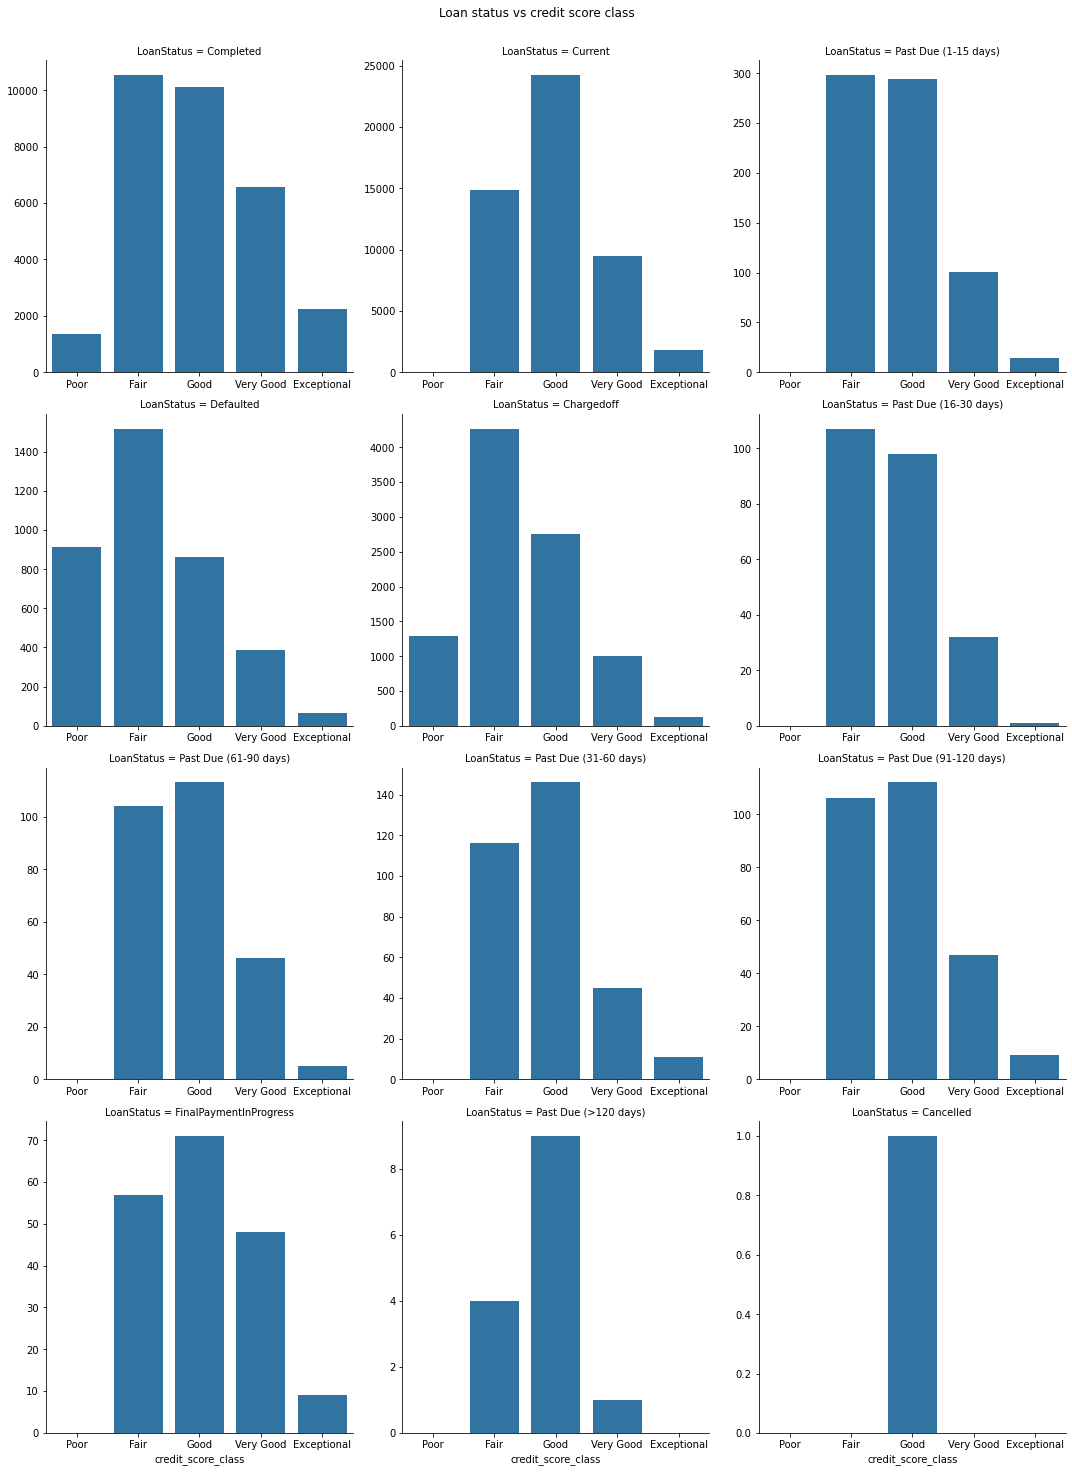

In [83]:
# Plotting countplot using seaborn's facetgrid.
ls=sns.FacetGrid(data=loan_df,col='LoanStatus',col_wrap=3,height=5,sharey=False,sharex=False)
ls.map(sns.countplot,'credit_score_class',order=['Poor','Fair','Good','Very Good','Exceptional'])
ls.fig.suptitle('Loan status vs credit score class',y=1.02);

> From above facet plot I have made some observations:
> - For loan status 'Default' most of the borrowers have either fair or poor credit score.<br>
> - Apart from this I can not make much interpretations because their could be other features which show some kind of relationship with these two categorical variables. Right now it is difficult to say anything about how credit score class influence loan status. I will try to find the relationship between these features using multivariate analysis.

### Let's explore 'Borrower APR' and 'Debt To Income Ratio'.

In [84]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_edges = np.arange(0,1+0.1,0.01)
bins_center = bins_edges[:-1]+0.0025
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['DebtToIncomeRatio'], bins_edges, include_lowest = True)
displ_binned



0        (0.16, 0.17]
1        (0.17, 0.18]
2        (0.05, 0.06]
3        (0.14, 0.15]
4        (0.25, 0.26]
             ...     
96302    (0.12, 0.13]
96303     (0.1, 0.11]
96304     (0.5, 0.51]
96305    (0.47, 0.48]
96306    (0.22, 0.23]
Name: DebtToIncomeRatio, Length: 96307, dtype: category
Categories (109, interval[float64]): [(-0.001, 0.01] < (0.01, 0.02] < (0.02, 0.03] < (0.03, 0.04] ... (1.05, 1.06] < (1.06, 1.07] < (1.07, 1.08] < (1.08, 1.09]]

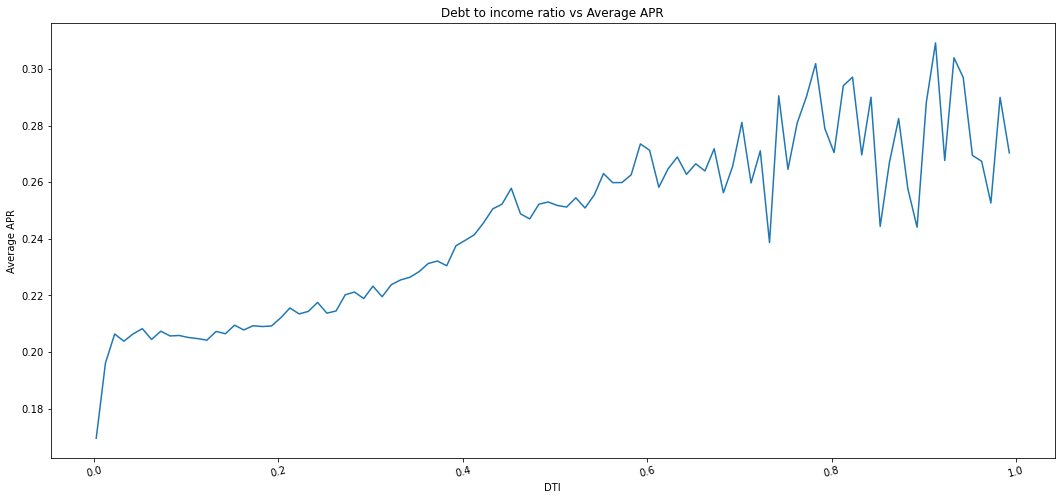

In [85]:
# Plotting line plot.
plt.figure(figsize=[18,8])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['DebtToIncomeRatio'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bins_center, y=comb_mean)
plt.xticks(rotation=15);
plt.xlabel('DTI')
plt.ylabel('Average APR')
plt.title('Debt to income ratio vs Average APR');

> Their seems to exist a weak positive correlation which indicate that while both variables DTI and APR tend to go up in response to one another, the relationship is not very strong.

### Let's explore 'Borrower APR' and 'Investors' variables.

In [86]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_edges = np.arange(1,1189+100,100)
bins_center = bins_edges[:-1]+50
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['Investors'], bins_edges, include_lowest = True)
displ_binned


0        (201.0, 301.0]
1        (0.999, 101.0]
2        (0.999, 101.0]
3        (101.0, 201.0]
4        (0.999, 101.0]
              ...      
96302    (0.999, 101.0]
96303    (0.999, 101.0]
96304    (101.0, 201.0]
96305    (201.0, 301.0]
96306    (0.999, 101.0]
Name: Investors, Length: 96307, dtype: category
Categories (12, interval[float64]): [(0.999, 101.0] < (101.0, 201.0] < (201.0, 301.0] < (301.0, 401.0] ... (801.0, 901.0] < (901.0, 1001.0] < (1001.0, 1101.0] < (1101.0, 1201.0]]

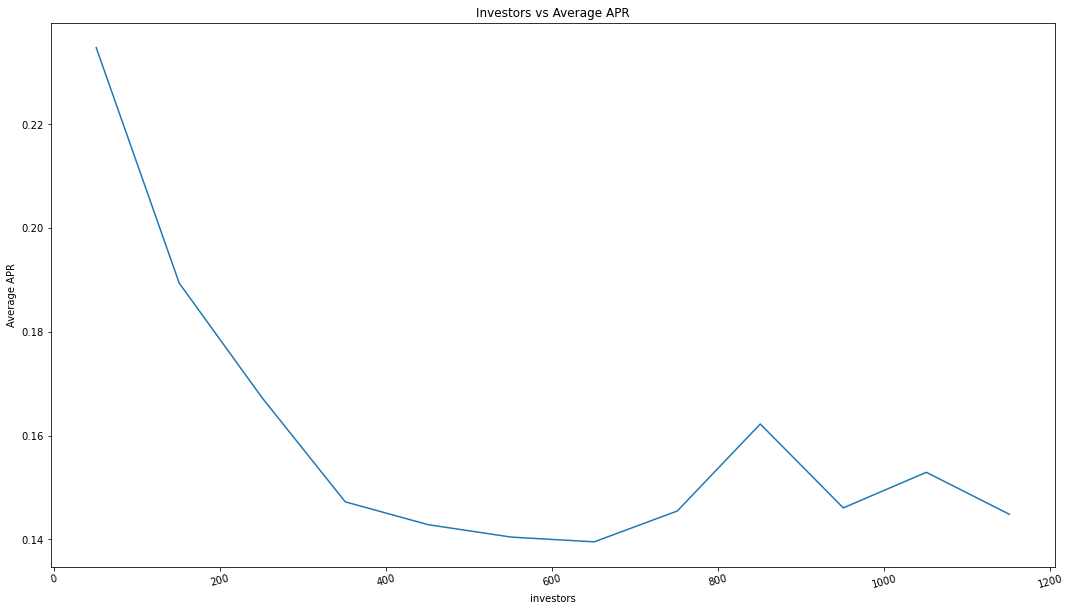

In [87]:
plt.figure(figsize=[18,10])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['DebtToIncomeRatio'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bins_center, y=comb_mean)
plt.xticks(rotation=15);
plt.xlabel('investors')
plt.ylabel('Average APR')
plt.title('Investors vs Average APR');

> > Their seems to exist a moderate negative correlation which indicate that while both variables Investors and APR tend to go down in response to one another, the relationship is moderately strong.

### Let's explore 'Borrower APR' and 'StatedMonthlyIncome'

In [88]:
# Taking data with monthly income less than 50000.
income = loan_df[loan_df['StatedMonthlyIncome']<=50000]

In [89]:
income['StatedMonthlyIncome'].describe()

count    96253.000000
mean      5706.390020
std       3697.929903
min          0.083333
25%       3333.333333
50%       4875.000000
75%       7000.000000
max      50000.000000
Name: StatedMonthlyIncome, dtype: float64

In [90]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_edges = np.arange(0,50000+100,2500)
bins_center = bins_edges[:-1]+1250
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(income['StatedMonthlyIncome'], bins_edges, include_lowest = True)
displ_binned


0         (2500.0, 5000.0]
1         (5000.0, 7500.0]
2         (-0.001, 2500.0]
3         (2500.0, 5000.0]
4        (7500.0, 10000.0]
               ...        
96302     (2500.0, 5000.0]
96303    (7500.0, 10000.0]
96304     (2500.0, 5000.0]
96305     (2500.0, 5000.0]
96306     (2500.0, 5000.0]
Name: StatedMonthlyIncome, Length: 96253, dtype: category
Categories (20, interval[float64]): [(-0.001, 2500.0] < (2500.0, 5000.0] < (5000.0, 7500.0] < (7500.0, 10000.0] ... (40000.0, 42500.0] < (42500.0, 45000.0] < (45000.0, 47500.0] < (47500.0, 50000.0]]

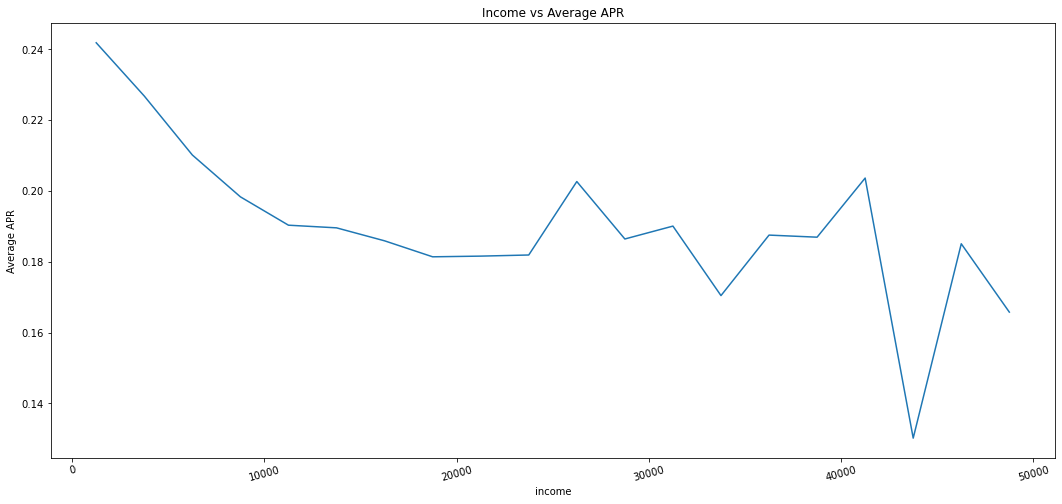

In [91]:
plt.figure(figsize=[18,8])
comb_mean = income['BorrowerAPR'].groupby(displ_binned).mean()
#comb_std = loan_df['DebtToIncomeRatio'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bins_center, y=comb_mean)
plt.xticks(rotation=15);
plt.xlabel('income')
plt.ylabel('Average APR')
plt.title('Income vs Average APR');

>> Their seems to exist a moderate negative correlation between APR and monthly income which indicate that while both variables tend to go down in response to one another, the relationship is not very strong.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Borrower APR was high for less loan original amount and low for high loan amount. Also, Borrower APR and debt to income ratio although tend to go up, had weak correlation whereas borrower APR was weaky negative correlated with monthly income.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Let's explore 'Loan Status' with 'Borrower APR' and 'Borrower Rate'.

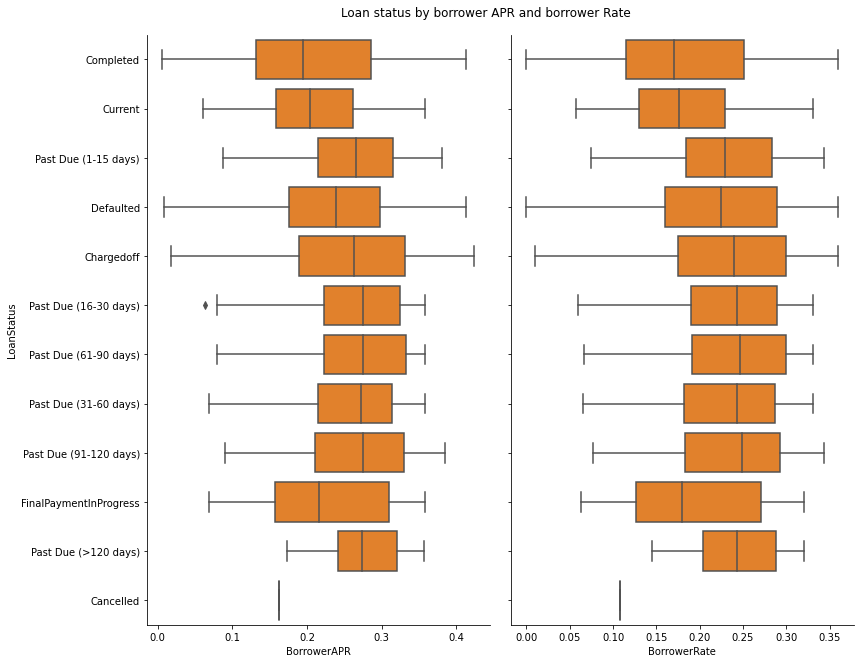

In [92]:
# Plotting boxplot using seaborn's facetgrid.
g = sns.PairGrid(data = loan_df, x_vars = ['BorrowerAPR', 'BorrowerRate'],
                y_vars = 'LoanStatus',height=9,aspect=0.6)
g.map(sns.boxplot, color=base_color(1))
g.fig.suptitle('Loan status by borrower APR and borrower Rate',y=1.02);

> I can not make any interpretation from above plot as their are so many box plots. I will try to use different plotting style to make any interpretations.

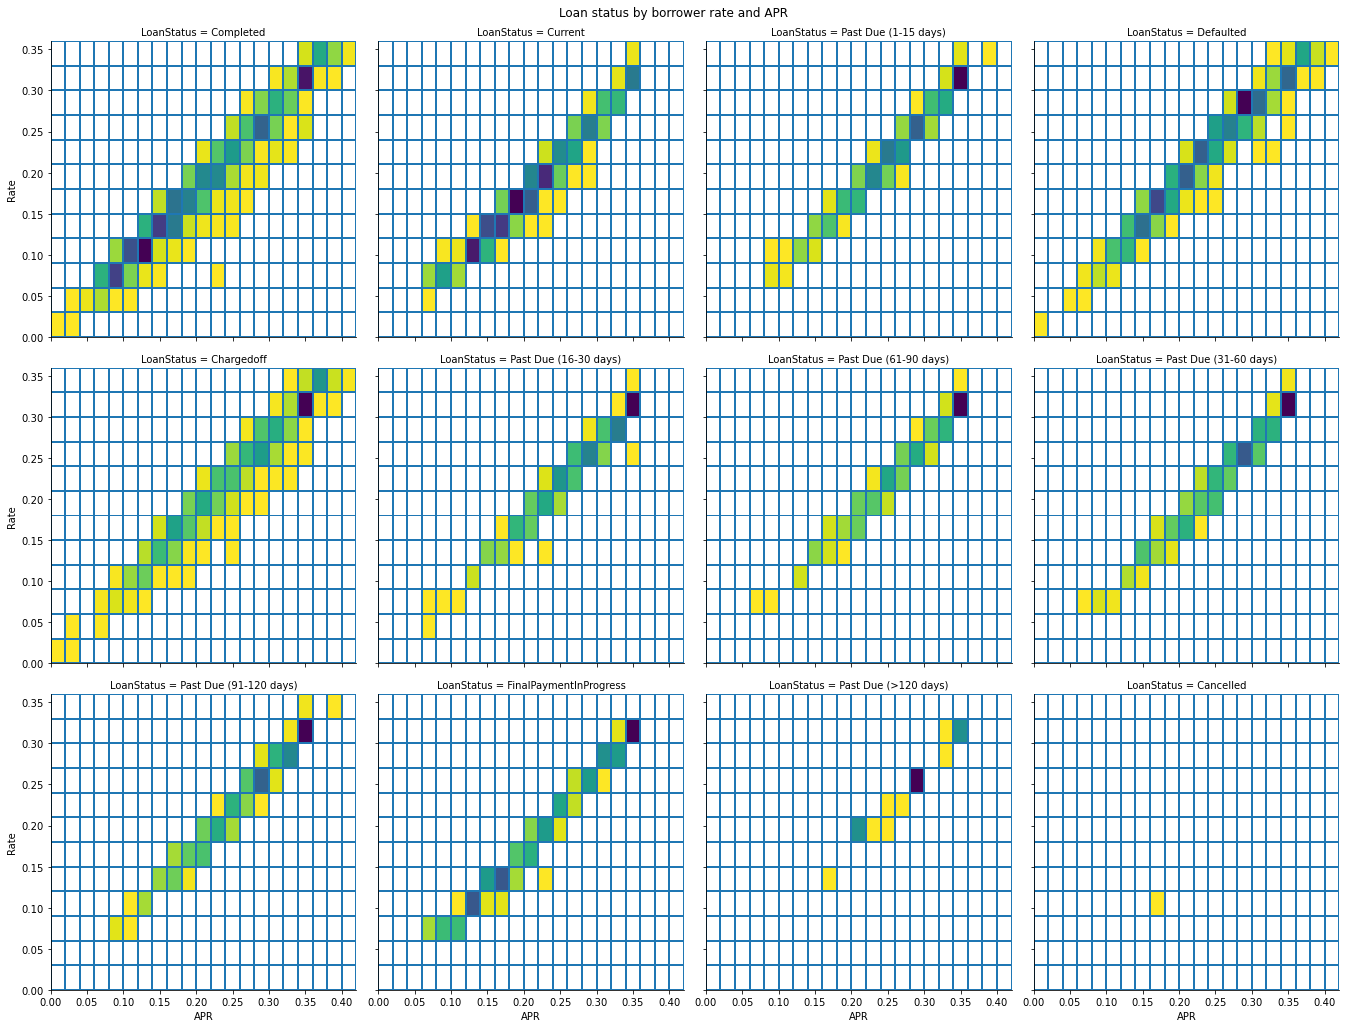

In [93]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max()+0.01,0.03)
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4.7)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Loan status by borrower rate and APR',y=1.01)

plt.show()


> From above histogram 2d I have made several observations:
> 1- Out of all loan status, 'completed' and 'current' status are the only ones with maximum count of APR and rate less than or equal to 0.2.<br>
> 2- Rest of the loan status have a 'cloud' of points above 0.2 for both APR and Rate except 'cancelled' status as it has only one record in our data.
> 3- If borrower APR and rate are high than loan status is more likely to be anything except 'current' and 'completed'

###  Let's explore 'loan status' , 'Loan Term',loan amount' and 'debt to income ratio'.

I want to see what features affect loan status.

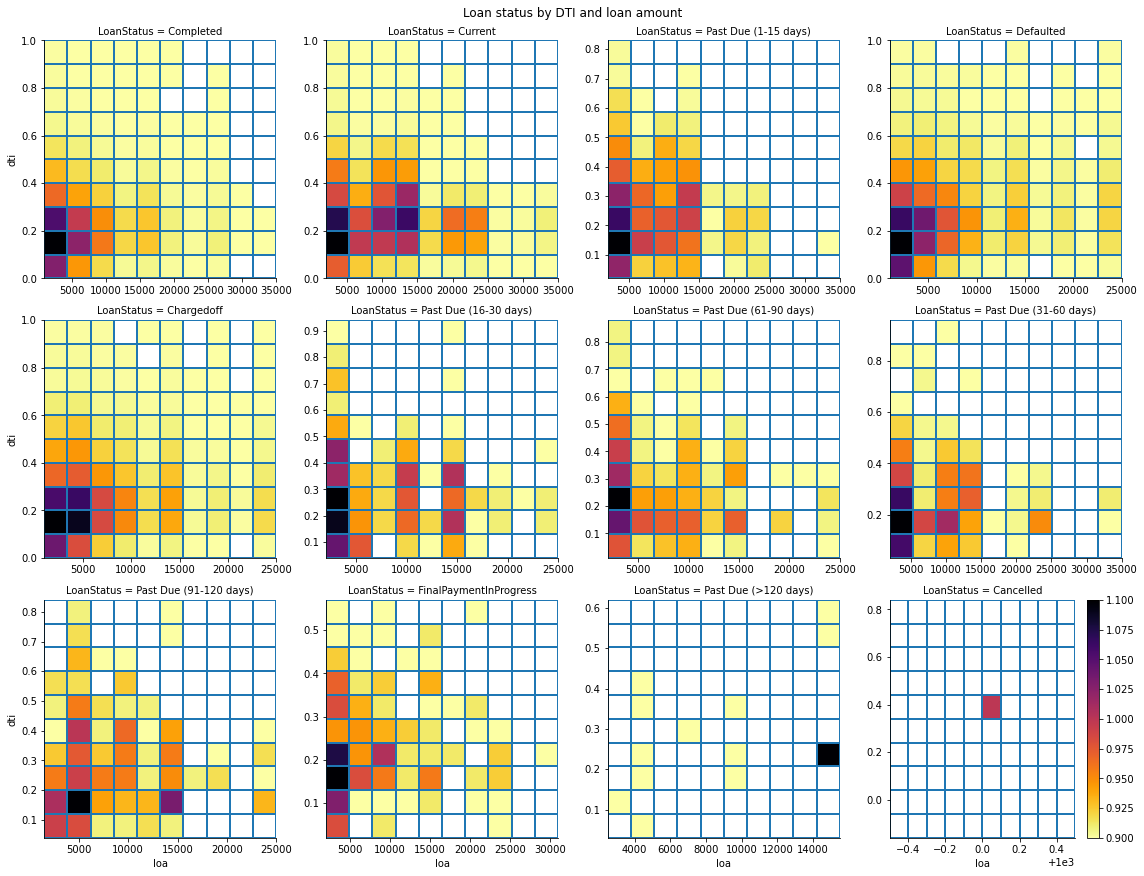

In [94]:
#bins_x = np.arange(1000,np.log10(loan_df['LoanOriginalAmount'].max())+0.01,0.2)
#bins_y = 10**(np.arange(0,loan_df['DebtToIncomeRatio'].max()+0.1,0.1))
# Plotting heatmap using seavorn's facetgrid
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4,sharex=False,sharey=False)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio',cmap = 'inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by DTI and loan amount',y=1.01)
plt.colorbar()
plt.show()

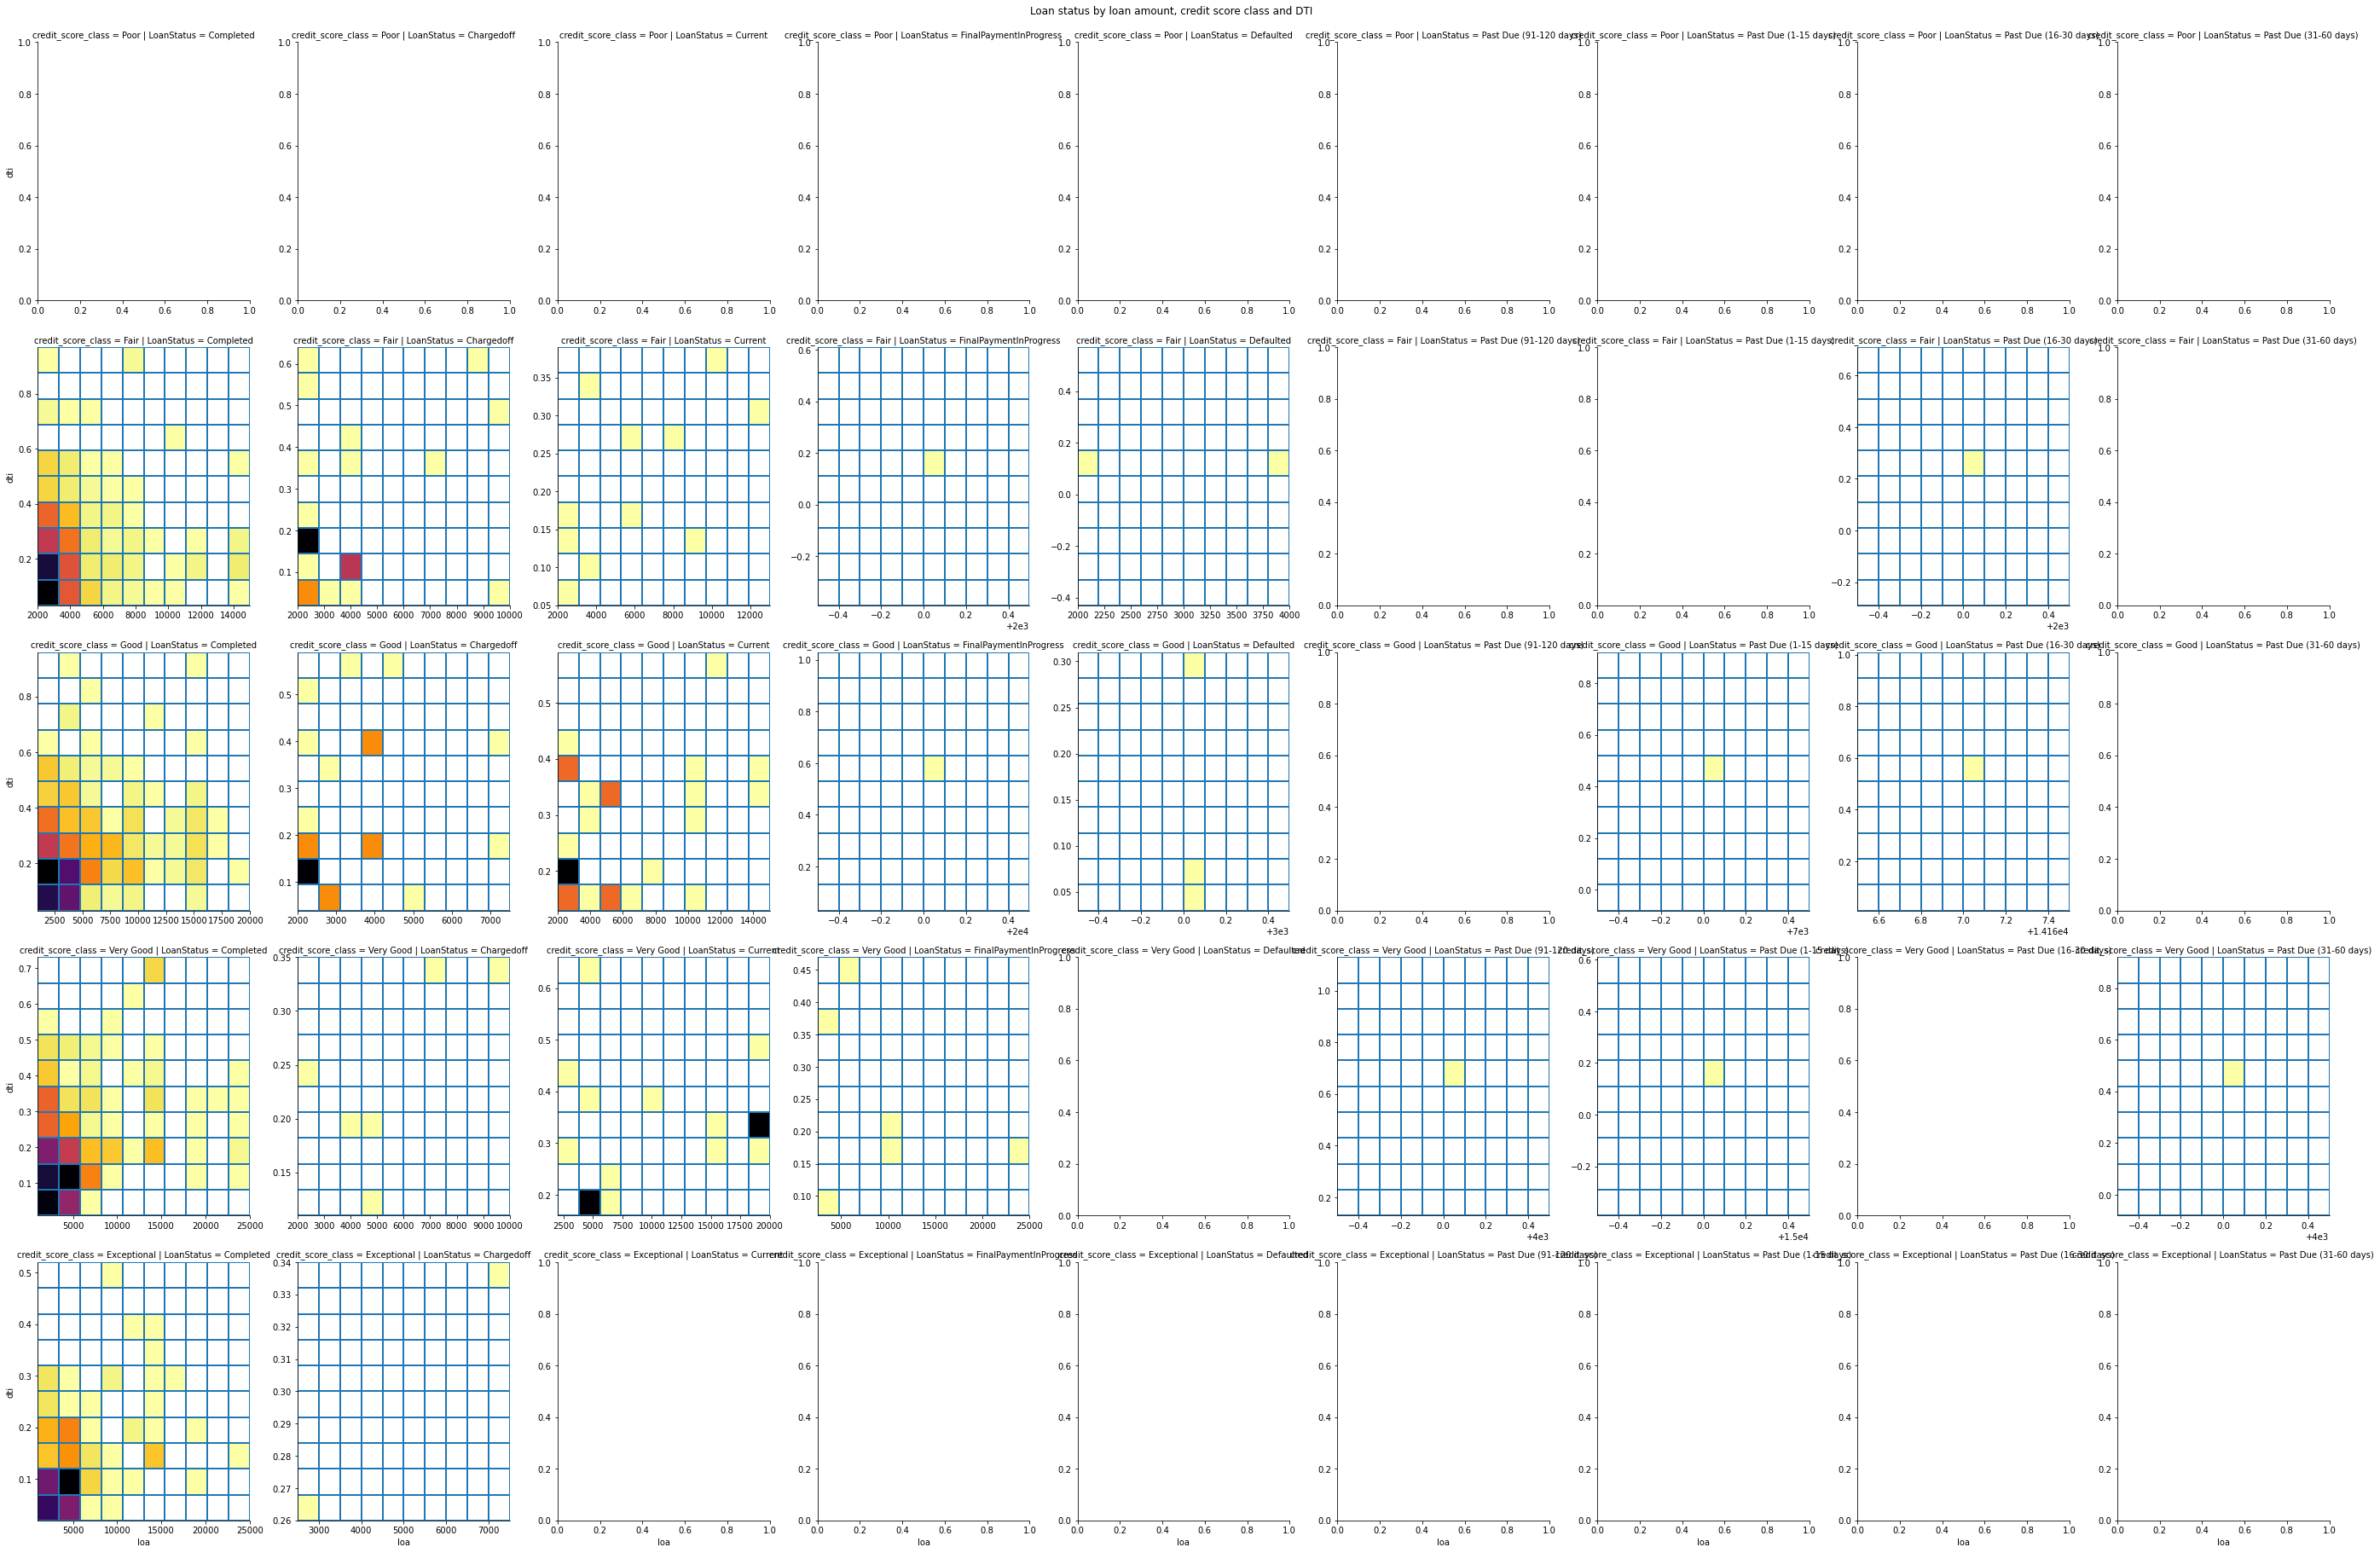

In [95]:
# Plotting heatmap for 'Term' = 12.
term12 = loan_df[loan_df['Term'] == 12]
#bins_x = np.arange(1000,term12['LoanOriginalAmount'].max()+0.01,0.05)
#bins_y = np.arange(0,term12['DebtToIncomeRatio'].max()+0.01,0.05)
g = sns.FacetGrid(data = term12, col = 'LoanStatus',row='credit_score_class', sharex=False,sharey=False,height = 5,aspect=0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap='inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount, credit score class and DTI',y=1.01)
#g.set(xlim=(1000, 37000), ylim=(0, 1.3), xticks=[1000, 5000, 10000,15000,20000,25000,30000,350000], yticks=[0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.show()

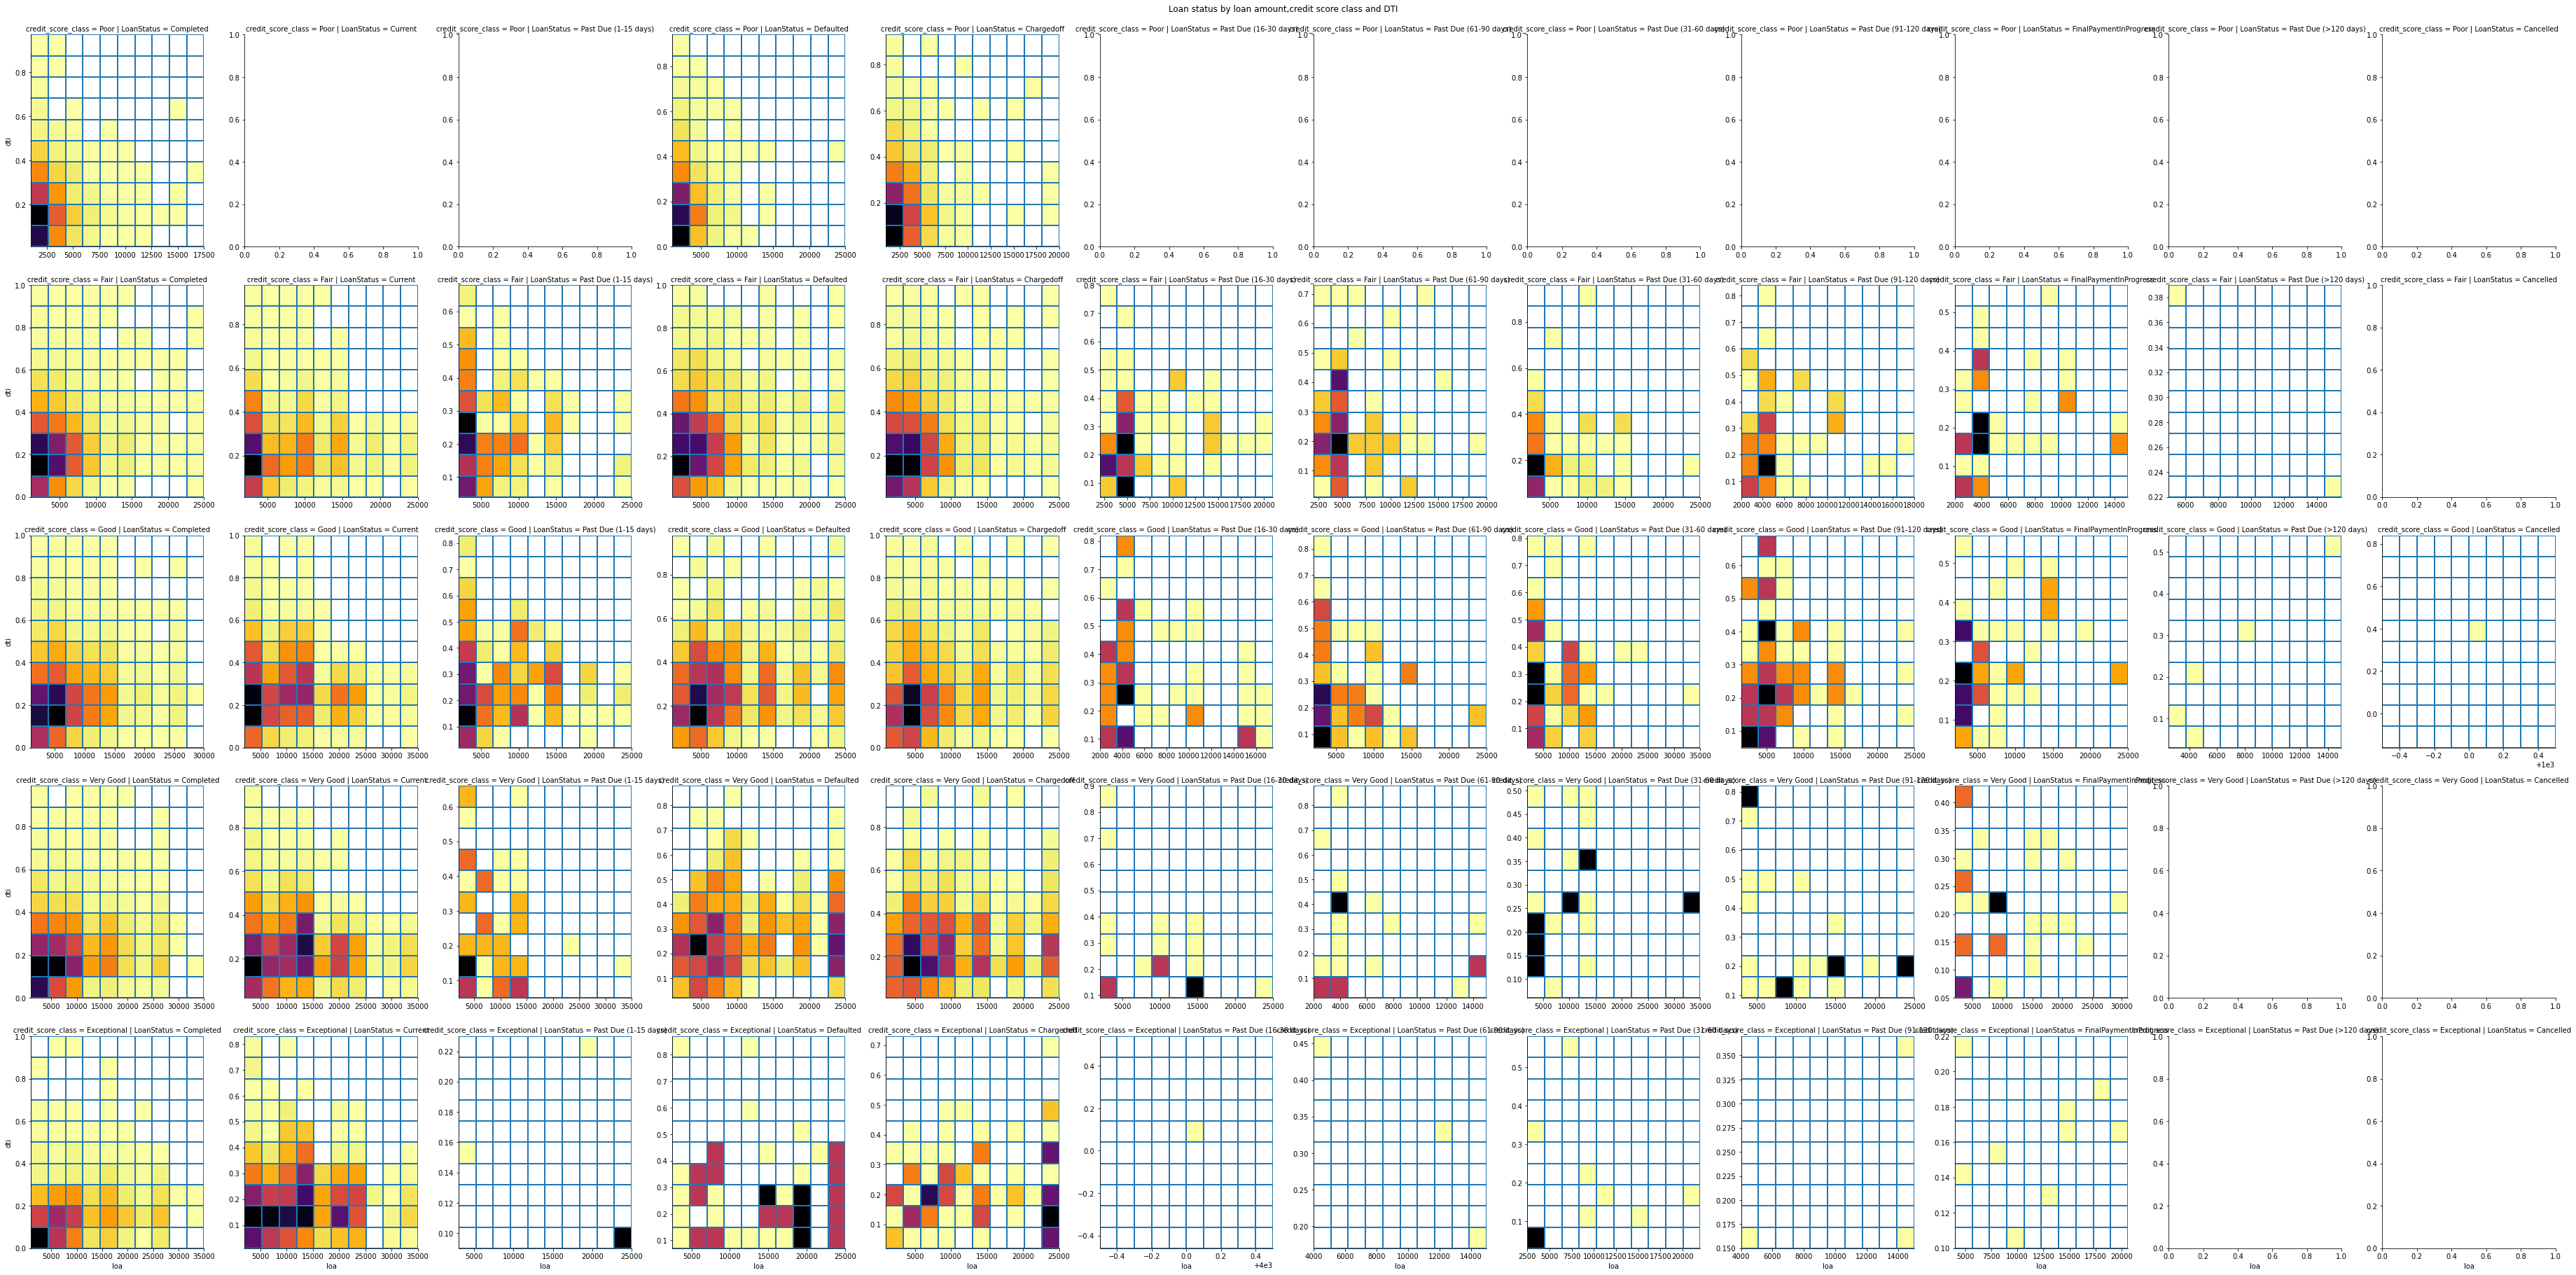

In [96]:
# Plotting heatmap for 'Term' = 36.
term36 = loan_df[loan_df['Term'] == 36]
#bins_x = np.arange(1000,term12['LoanOriginalAmount'].max()+0.01,0.05)
#bins_y = np.arange(0,term12['DebtToIncomeRatio'].max()+0.01,0.05)
g = sns.FacetGrid(data = term36, col = 'LoanStatus',row='credit_score_class', sharex=False,sharey=False,height = 5,aspect=0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap='inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount,credit score class and DTI',y=1.01)
#g.set(xlim=(1000, 37000), ylim=(0, 1.3), xticks=[1000, 5000, 10000,15000,20000,25000,30000,350000], yticks=[0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.show()

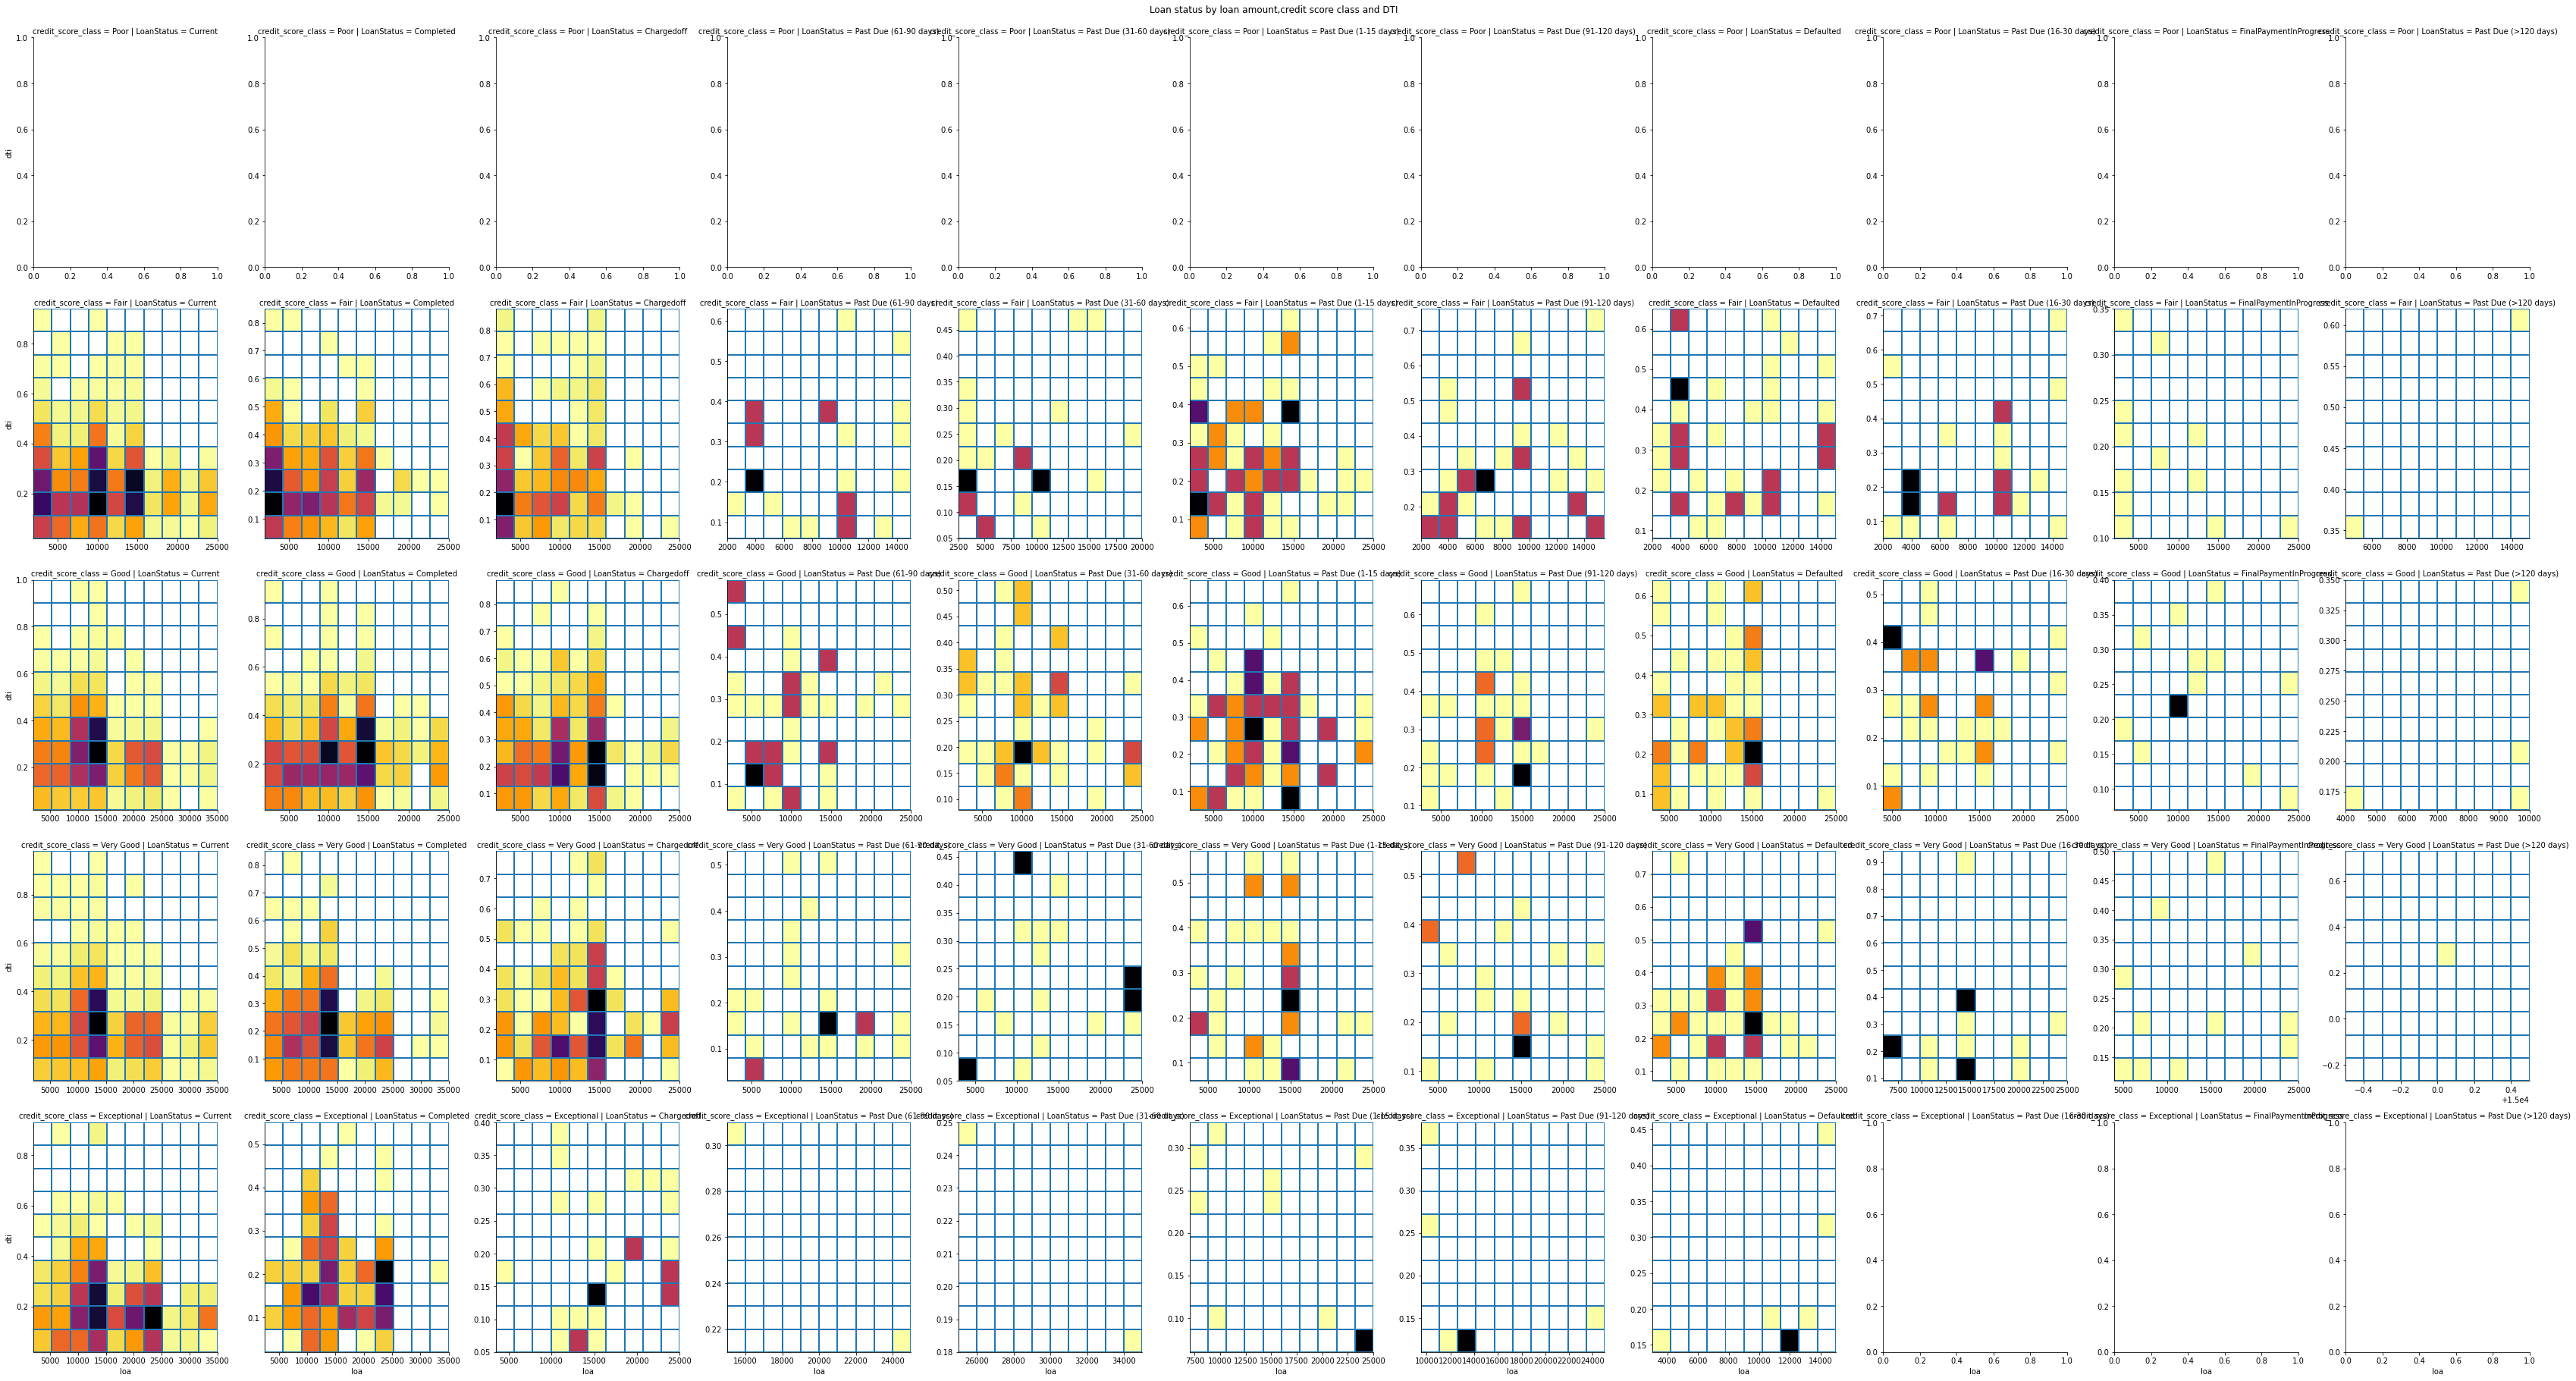

In [97]:
# Plotting heatmap for 'Term' = 60.
term60 = loan_df[loan_df['Term'] == 60]
#bins_x = np.arange(1000,term12['LoanOriginalAmount'].max()+0.01,0.05)
#bins_y = np.arange(0,term12['DebtToIncomeRatio'].max()+0.01,0.05)
g = sns.FacetGrid(data = term60, col = 'LoanStatus',row='credit_score_class',sharex=False,sharey=False,height = 5,aspect=0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap='inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount,credit score class and DTI',y=1.01)
#g.set(xlim=(1000, 37000), ylim=(0, 1.3), xticks=[1000, 5000, 10000,15000,20000,25000,30000,350000], yticks=[0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.show()

> From above hist2d I have made several observations:<br>
> 1- For 'Term' = 12, loan status 'Complete' has maximum data points with most of the Borrower APR less than 0.2 between 1000 and 5000 loan amount. Also, loan status of 'current' and 'charged off' have some points with 'current' having 'cloud' of points above 0.2 debt to income ratio and 'chargedoff' having 'cloud' of points below 0.2 debt to income ratio. Rest of the loan status either have very few data or no data at all for term 12.<br>
>2- For 'Term' = 36, every loan status have some amount of data available with 'complete' having the maximum data for giving debt to income ratio and loan original amount. Also, I observed that loan status which have very less or no data available for term-12 are having some amount of data. This means that borrowers who took loan for 36 months term with debt to income ratio of greater than 0.2 are more likely to have loan status of 'past due', 'default', 'chargeoff'.<br>
>3- For 'Term' = 60, I observed that many borrowers have taken large amount compare to terms 12 and 36 and those who took loan between 10000-15000 are more likely to have high debt to income ratio.<br><br>
> Hence, loan amount,term,and debt to income ratio does play an important role in deciding the loan status. Let's see how credit score, 

### Let's explore 'credit class','monthly income', and 'loan status'.

In [98]:
# Grouping data by credit score class,loan status and calculating mean of monthly income for each grouping variable.
mean_income = loan_df.groupby(['credit_score_class','LoanStatus'])['StatedMonthlyIncome'].mean()

In [99]:
mi=mean_income.reset_index()

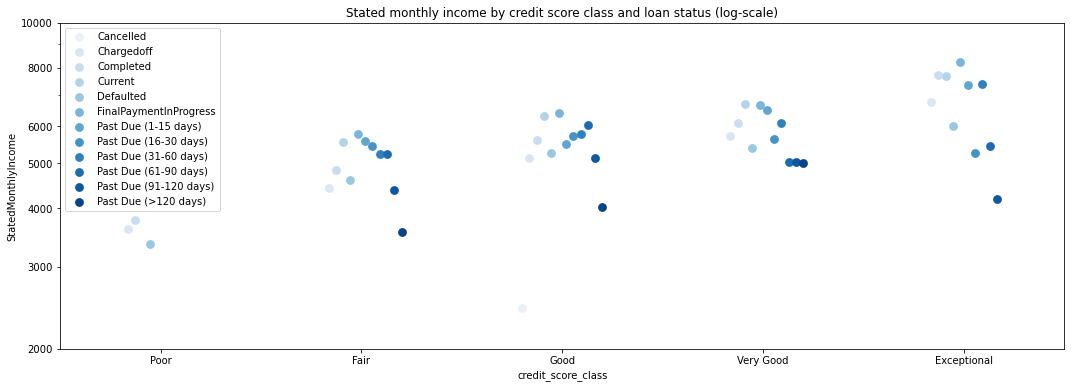

In [100]:
# Plotting pointplot by taking log transformation on y-axis.
fig = plt.figure(figsize = [18,6])
ax = sns.pointplot(data = mi, x = 'credit_score_class', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
#plt.title('0.3-carat diamond prices across cut and clarity')
#plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([2e3, 3e3, 4e3,5e3,6e3,8e3,10e3], ['2000', '3000','4000','5000','6000','8000','10000'])
ax.set_yticklabels([],minor = True)
#plt.xticks(rotation=25)
plt.legend(loc=2)
plt.title('Stated monthly income by credit score class and loan status (log-scale)')
plt.show();

> It is clear from above point plot that with loan status and change in credit score from 'Poor' to 'Exceptional' we can observe increase in stated monthly income. 

### Let's find the relationship between 'credit score class' and 'Borrower APR' and 'Borrower Rate'.

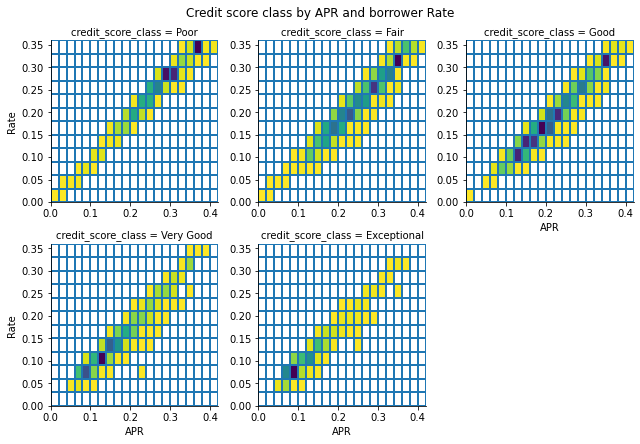

In [101]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max()+0.01,0.03)
g = sns.FacetGrid(data = loan_df, col = 'credit_score_class', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Credit score class by APR and borrower Rate',y=1.02)

plt.show()


 > Maximum borrowers with credit score 'Good', 'Very Good' and 'Exceptional' had borrower APR and borrower Rate below 0.20.

### Let's find the relationship between 'Employment status' and 'Borrower APR' and 'Borrower Rate'.

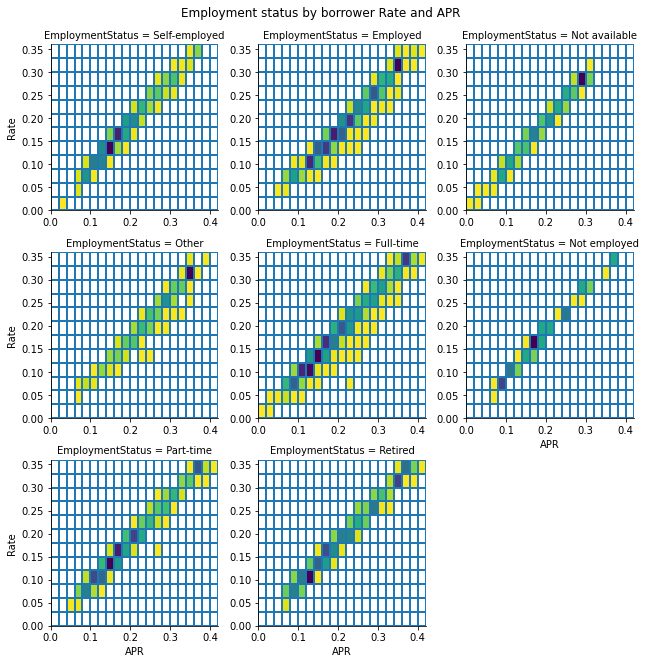

In [102]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max()+0.01,0.03)
g = sns.FacetGrid(data = loan_df, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Employment status by borrower Rate and APR',y=1.02)
plt.show()


### Let's find the relationship between 'credit score class' and 'loan original amount' and 'debt to income ratio'.

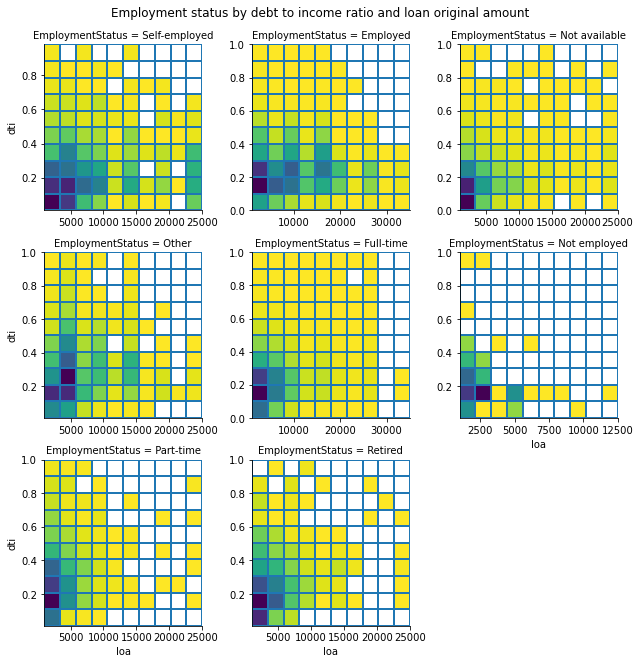

In [103]:
# Plotting heatmap using seaborn's facetgrid.
bins = (np.arange(0,1+0.01,0.02))**1/3
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
bins_y = np.log10(np.arange(1000,loan_df['LoanOriginalAmount'].max()+40,1500))
tick_y=[]
g = sns.FacetGrid(data = loan_df, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio', cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Employment status by debt to income ratio and loan original amount',y=1.02)

plt.show()



> Many borrowers having self employed as employment status, have had loan original amount close to 25000. Borrowers with 'not employed' as employment staus are very less in our data and also most of them have loan amount close to 2500 only with APR cloase to 0.20.

###  Surprising interactions between features.

> In multivariate analysis of borrower APR, borrower Rate and Employment Status, most of the data with the status 'Not Employed' surprisingly had low APR and low rate (below 0.2). But after further analysis it turns out to be that 'Not employed' although had low loan original amount, its debt to income ratio was low for most of the borrowers and also its data is very less. This could be the reason why 'Not Employed' had low APR.